<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## You are tasked with creating a regression model based on the Ames Housing Dataset. 
## This model will be used to predict the price of a house at sale.

#### The Modeling Process

1. The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
2. Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
3. Predict the values for your target column in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
4. Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?

# City of Ames, Iowa

https://www.cityofames.org/about-ames/about-ames
- Population of around 65000
- Home to Iowa State University (36000 students in total)

Weather Conditions
- https://weatherspark.com/y/10339/Average-Weather-in-Ames-Iowa-United-States-Year-Round
- Since the weather can be really cold in winter, heaters and heating condition will be a necessity for the people living in Ames

### Import the modules to be used for the project

In [567]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

%matplotlib inline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm

### Import the datasets to be used for the project

#### Data Files

* ['train.csv](./datasets/train.csv): Training Dataset for Ames
* ['test.csv](./datasets/test.csv): Training Dataset for Ames
* ['sample_sub_reg.csv](./datasets/sample_sub_reg.csv): Sample Submission File for Kaggle

In [568]:
# Import Data from given CSV files
train1 = pd.read_csv('datasets/train.csv')
test1 = pd.read_csv('datasets/test.csv')

### Create an understanding of the dataset

In [569]:
# Total rows and columns for each dataset
print(train1.shape)
print(test1.shape)

(2051, 81)
(879, 80)


In [570]:
# View the dataset first 5 rows - Training Data
train1.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [571]:
# View the dataset first 5 rows - Testing Data
test1.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

##### Each row in the dataset represents all the features in the dataset that influences the price of a house
##### Each column represents one feature about a house, except ID

### Exploring the dataset

#### Train dataset

In [572]:
# Gather information about each column in the dataset
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [573]:
# Since there are quite a few columns with null values, we will explore to see exact values
train1.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

counts
Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1

#### Cleaning the dataset (Train)

In [574]:
# We can either the delete the columns will null values, or fill in the null values with zero or none for features that do not exist
# Choosing to fill in the values
values = {'Bsmt Exposure':'None', 'BsmtFin Type 2':'No', 'BsmtFin Type 1': 'No', 'Bsmt Cond': 'No','Bsmt Qual':'No',
          'Mas Vnr Type':'None', 'Garage Finish': 'No', 'Garage Cond': 'No', 'Garage Qual': 'No', 'Garage Type': 'No',
          'Mas Vnr Area':0, 'Bsmt Full Bath':0, 'Bsmt Half Bath':0, 'Garage Cars':0, 'Total Bsmt SF':0, 'Bsmt Unf SF':0,
          'BsmtFin SF 2':0, 'Garage Area':0, 'BsmtFin SF 1':0, 'Garage Yr Blt':0, 'Lot Frontage':0, 'Pool QC': 'No',
          'Misc Feature': 'No','Alley':'No','Fence':'No','Fireplace Qu':'No'}

# Creating a new dataframe to keep the original null values in the original dataframe
train2 = train1.fillna(value=values)

# Check to see if any null value still remains
train2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

Empty DataFrame
Columns: [counts]
Index: []

#### Test dataset

In [575]:
# Gather information about each column in the dataset
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [576]:
# Since there are quite a few columns with null values, we will explore to see exact values
test1.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

counts
Pool QC            875
Misc Feature       838
Alley              821
Fence              707
Fireplace Qu       422
Lot Frontage       160
Garage Cond         45
Garage Qual         45
Garage Yr Blt       45
Garage Finish       45
Garage Type         44
Bsmt Exposure       25
BsmtFin Type 1      25
Bsmt Qual           25
BsmtFin Type 2      25
Bsmt Cond           25
Mas Vnr Area         1
Mas Vnr Type         1
Electrical           1

#### Cleaning the dataset (Test)

We see a new column with null value 'Electrical'. The column represents types of Electrical appliance and every house would 
have one, hence it cannot be replaced with zero or none.

We will explore to see which type of appliance has the highest proportion and use that as a replacement for the missing value.

In [577]:
# Finding out proportion of Electrical column
test1['Electrical'].value_counts(normalize=True)

SBrkr    0.927107
FuseA    0.054670
FuseF    0.017084
FuseP    0.001139
Name: Electrical, dtype: float64

In [578]:
# We can either the delete the columns will null values, or fill in the null values with zero or none for features that do not exist
# Choosing to fill in the values (For Electrical fill in SBrkr)
test_values = {'Bsmt Exposure':'None', 'BsmtFin Type 1': 'No', 'Bsmt Cond': 'No','Bsmt Qual':'No','Mas Vnr Type':'None',
               'Mas Vnr Area':0,'BsmtFin Type 2':'No','Electrical':'SBrkr','Garage Finish': 'No', 'Garage Cond': 'No',
               'Garage Qual': 'No', 'Garage Type': 'No','Garage Yr Blt':0, 'Lot Frontage':0,'Pool QC': 'No',
               'Misc Feature': 'No','Alley':'No','Fence':'No','Fireplace Qu':'No'}

# Creating a new dataframe to keep the original null values in the original dataframe
test2 = test1.fillna(value=test_values)

# Check to see if any null value still remains
test2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

Empty DataFrame
Columns: [counts]
Index: []

### Looking at values in the data

In [579]:
# Since we want to predict price, we want to know the range of the price of houses in our dataset
train2['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

- House with minimum price: 12,789
- House with maximum price: 611,657
- Average price of all houses in the dataset: 181,469

In [580]:
# We also want to know how many years of information have we got of the houses that are sold
train2['Yr Sold'].describe()

count    2051.000000
mean     2007.775719
std         1.312014
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64

- Data ranges from houses sold between 2006 and 2010

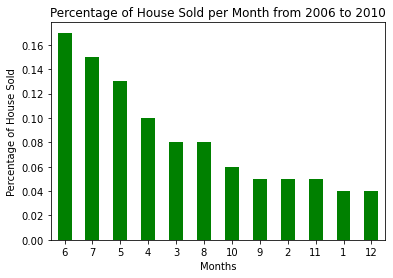

In [581]:
# Exploring to see which months are the best for putting up your house for sale
train2['Mo Sold'].value_counts(normalize=True).round(2).plot(kind='bar', rot=0, color='green');
plt.xlabel('Months')
plt.ylabel('Percentage of House Sold')
plt.title('Percentage of House Sold per Month from 2006 to 2010');

- Most of the houses are sold in the summer from May to July
- Least amount of houses are sold in winter months November to January

### Exploratory Data Analysis

### Exploratory Data Analysis (for Numeric Dataset)

In [582]:
# Since 'PID' has nothing to do with house prices we can just drop the column
train2 = train2.drop(columns='PID')
train2.shape

(2051, 80)

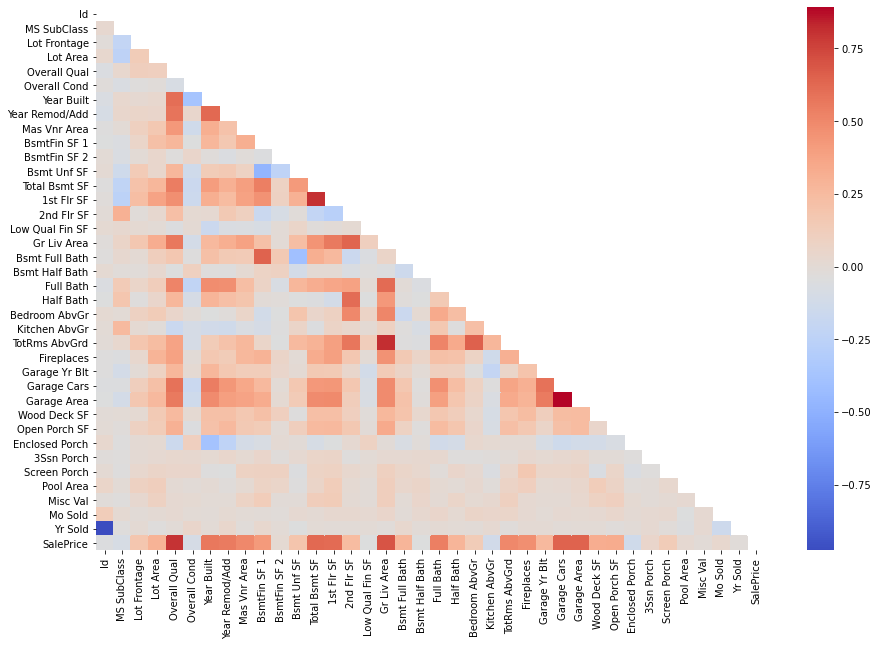

In [583]:
# Exploring correlations between numeric values in the dataset
# Plotting a heatmap to see correlation between all numeric variables
plt.figure(figsize=(15,10))
mask = np.triu(train2.corr())
sns.heatmap(train2.corr(), cmap='coolwarm', mask=mask);

In [584]:
# To get clearer picture of correlations, lets put it in a dataframe
train2.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Overall Qual  Gr Liv Area  Garage Area  Garage Cars  \
SalePrice        1.0      0.800207     0.697038     0.649897     0.647781   

           Total Bsmt SF  1st Flr SF  Year Built  Year Remod/Add  Full Bath  \
SalePrice       0.629303    0.618486    0.571849         0.55037   0.537969   

           TotRms AbvGrd  Mas Vnr Area  Fireplaces  BsmtFin SF 1  \
SalePrice       0.504014      0.503579    0.471093      0.423856   

           Open Porch SF  Wood Deck SF  Lot Area  Bsmt Full Bath  Half Bath  \
SalePrice       0.333476       0.32649  0.296566        0.283332   0.283001   

           Garage Yr Blt  2nd Flr SF  Bsmt Unf SF  Lot Frontage  \
SalePrice       0.258645    0.248452     0.190861      0.181456   

           Bedroom AbvGr  Screen Porch  3Ssn Porch   Mo Sold  Pool Area  \
SalePrice       0.137067      0.134581    0.048732  0.032735   0.023106   

           BsmtFin SF 2  Misc Val   Yr Sold  Low Qual Fin SF  Bsmt Half Bath  \
SalePrice      0.016432 -0.007375 -0.015203        -0.041594        -0.04529   

                 Id  MS SubClass  Overall Cond  Kitchen AbvGr  Enclosed Porch  
SalePrice -0.051398    -0.087335     -0.097019      -0.125444       -0.135656

We can see a handful of features with quite high correlation to sales price (above 0.4):
- Overall Qual - Overall Quality
- Gr Liv Area - Above ground living area (square feet)
- Garage Area - Total garage area (square feet)
- Garage Cars - Number of cars that can be parked
- Total Bsmt SF - Total Basement area (square feet)
- 1st Flr SF - 1st Floor area (square feet)
- Year Built - Year the house was built in
- Year Remod/Add - Year it was remodeled
- Full Bath - Number of bathrooms above ground
- TotRms AbvGrd - Total rooms above ground (excluding bathroom)
- Mas Vnr Area - Masonry veneer area in square feet
- Fireplaces - Number of fireplaces
- BsmtFin SF 1 - Basement area (square feet)

Visualizating correlation between SalePrice and Numeric values

In [585]:
def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


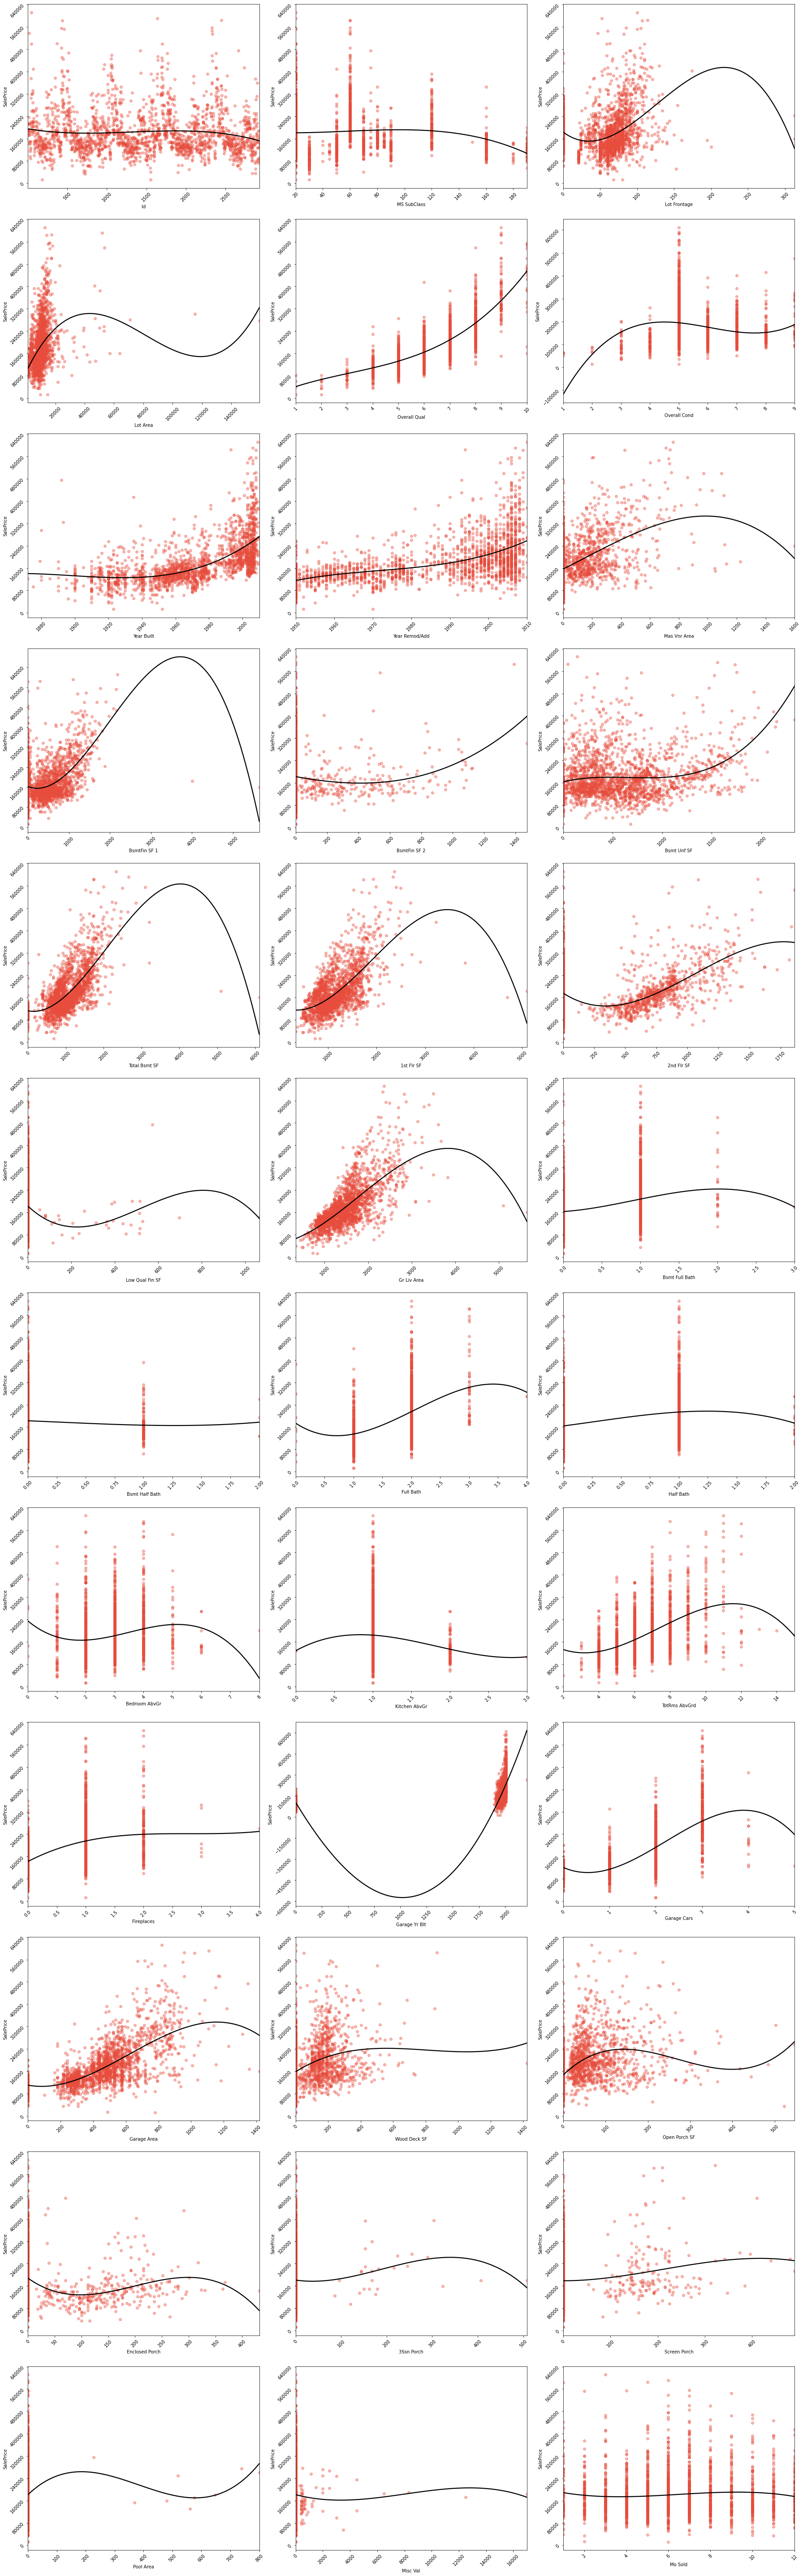

In [586]:
srt_reg('SalePrice', train2);

From the above visualization, we can see outliers in the data. To visualize it better, we can do a boxplot for it.

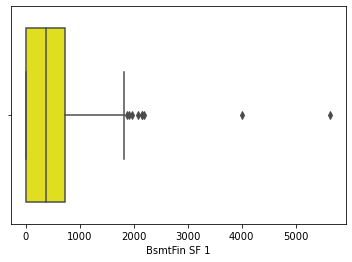

In [587]:
# We see that in BsmtFin SF 1 the curve suddenly goes down even though the area is increasing
# Boxplot of BsmtFin SF 1
sns.boxplot(data=train2,x='BsmtFin SF 1',color='yellow');

In [588]:
# We see that BsmtFin SF 1 might be affecting our correlation as other features also lead to it becoming outliers.
train2[train2['BsmtFin SF 1']>3000]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
960   1499           60        RL         313.0     63887   Pave    No   
1885  2181           20        RL         128.0     39290   Pave    No   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
960        IR3          Bnk    AllPub     Corner        Gtl      Edwards   
1885       IR1          Bnk    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
960        Feedr        Norm      1Fam      2Story            10   
1885        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
960        Stucco       Stucco        Stone         796.0         Ex   
1885      CemntBd      CmentBd        Stone        1224.0         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
960          TA      PConc        Ex        TA            Gd            GLQ   
1885         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960         5644.0            Unf           0.0        466.0         6110.0   
1885        4010.0            Unf           0.0       1085.0         5095.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
960     GasA         Ex           Y      SBrkr        4692         950   
1885    GasA         Ex           Y      SBrkr        5095           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
960                 0         5642             2.0             0.0          2   
1885                0         5095             1.0             1.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
960           1              3              1           Ex             12   
1885          1              2              1           Ex             15   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
960         Typ           3           Gd      Attchd         2008.0   
1885        Typ           2           Gd      Attchd         2008.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
960            Fin          2.0       1418.0          TA          TA   
1885           Fin          3.0       1154.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
960            Y           214            292               0           0   
1885           Y           546            484               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
960              0        480      Gd    No           No         0        1   
1885             0          0      No    No         Elev     17000       10   

      Yr Sold Sale Type  SalePrice  
960      2008       New     160000  
1885     2007       New     183850

In [589]:
# Filtering it out might help improve our correlation of other variables as well
# Removing the outlier from the data
train2 = train2[train2['BsmtFin SF 1']<3000]
# Testing to see if the correlation has improved
# Before removing the outlier, the correlation with SalePrice was 0.423856
train2['SalePrice'].corr(train2['BsmtFin SF 1'])

0.44610301160731425

In [590]:
# To get clearer picture of correlations, lets put it in a dataframe once again
train2.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  \
SalePrice        1.0      0.803462     0.719463       0.665116     0.655097   

           1st Flr SF  Garage Cars  Year Built  Year Remod/Add  Full Bath  \
SalePrice    0.648252     0.648227    0.572405        0.550872   0.538225   

           Mas Vnr Area  TotRms AbvGrd  Fireplaces  BsmtFin SF 1  \
SalePrice      0.511273       0.509775    0.473783      0.446103   

           Open Porch SF  Wood Deck SF  Lot Area  Bsmt Full Bath  Half Bath  \
SalePrice       0.338545      0.327629  0.303744        0.284433   0.283372   

           Garage Yr Blt  2nd Flr SF  Bsmt Unf SF  Lot Frontage  \
SalePrice       0.258697    0.248826     0.190883      0.185351   

           Bedroom AbvGr  Screen Porch  3Ssn Porch   Mo Sold  Pool Area  \
SalePrice       0.137145      0.134555    0.048721  0.032508   0.025805   

           BsmtFin SF 2  Misc Val   Yr Sold  Low Qual Fin SF  Bsmt Half Bath  \
SalePrice      0.016398 -0.010323 -0.015174        -0.041608       -0.045534   

                 Id  MS SubClass  Overall Cond  Kitchen AbvGr  Enclosed Porch  
SalePrice -0.051416    -0.087331     -0.097093      -0.125472       -0.135713

C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


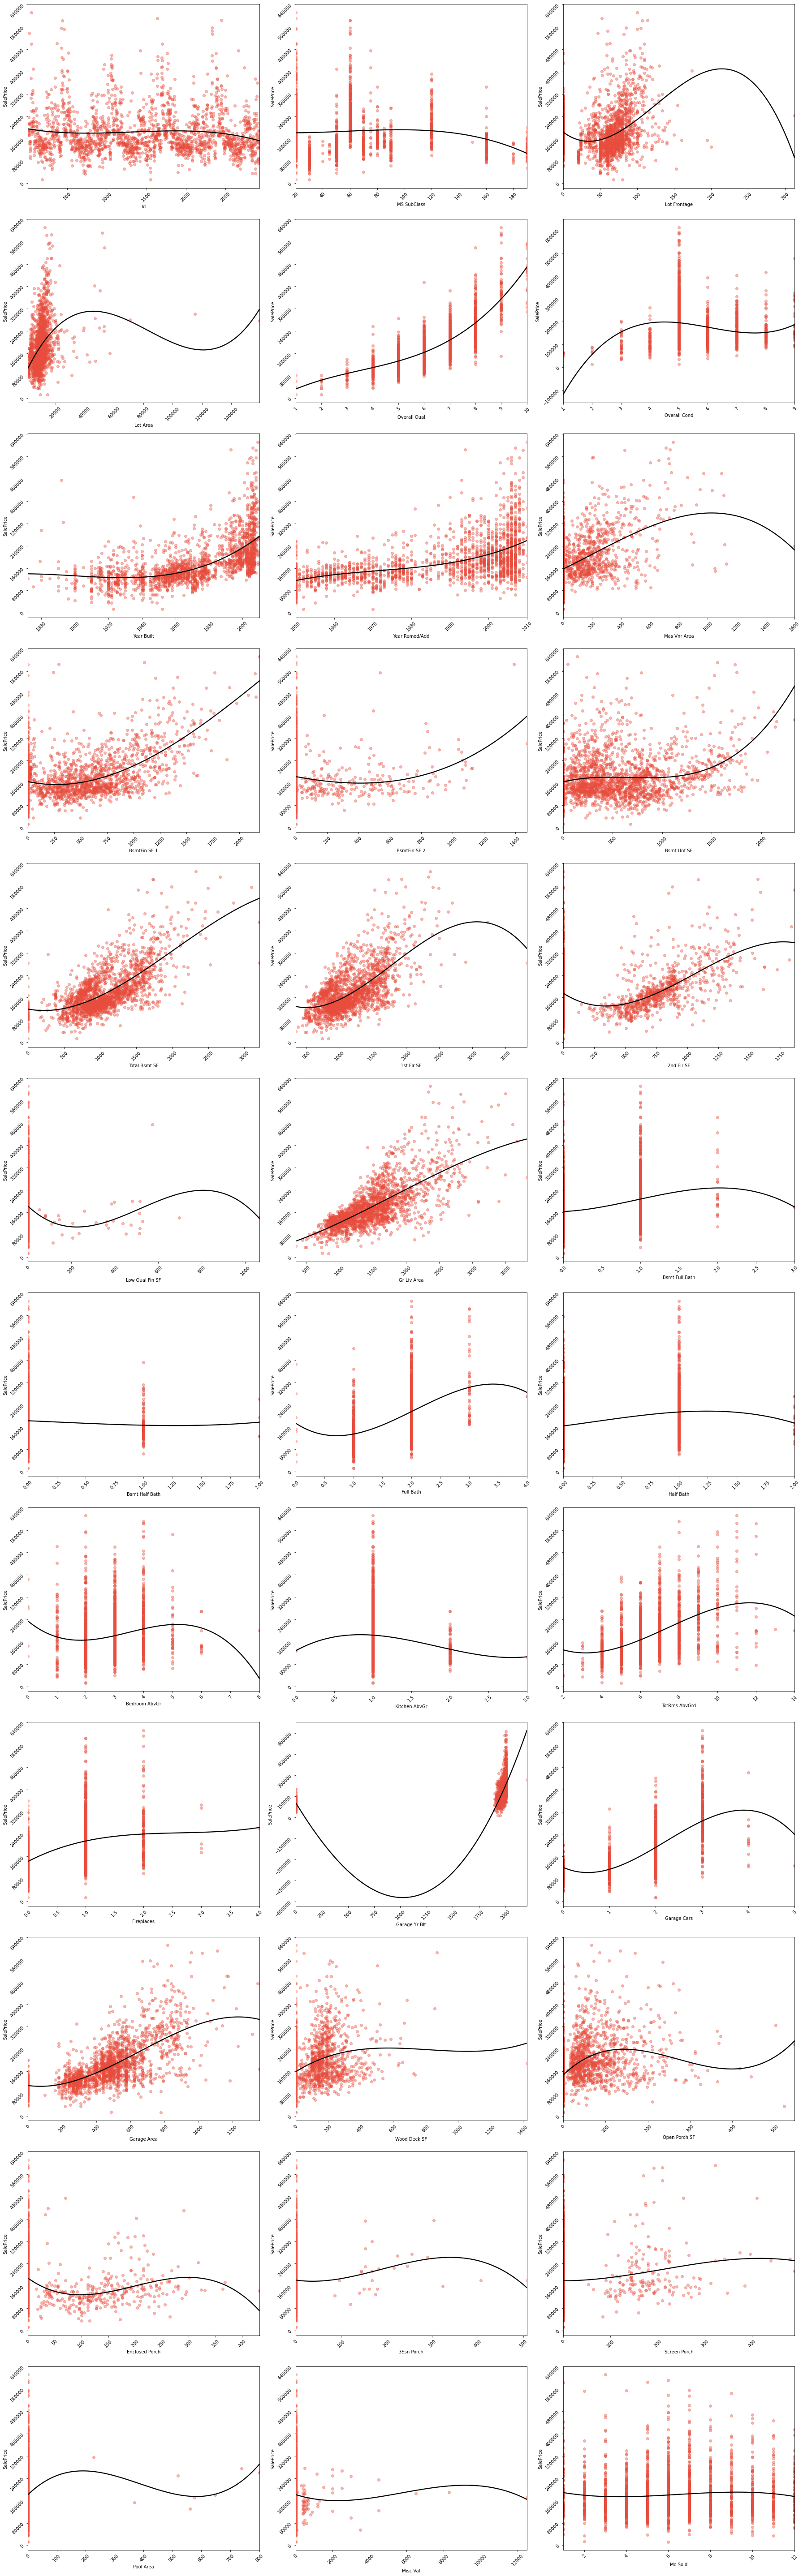

In [591]:
srt_reg('SalePrice', train2);

We can see an improvement in curves for a lot of the numeric variables after removing the outlier from BsmtFin SF 1

### Setting up Regression models

In [592]:
# Creating a function to get regression results for all models
def all_model(features):
    X_train = train2[features]
    X_test = test2[features]
    
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_sc = ss.transform(X_train)
    X_test_sc = ss.transform(X_test)
    y_train = train2['SalePrice']
    
    lr = LinearRegression()
    lr.fit(X_train_sc,y_train)
    
    lr_r2_score = lr.score(X_train_sc,y_train)
    print("LR R2 Score:",lr_r2_score)
    lr_r2_cv_x_train_sc = cross_val_score(lr, X_train_sc, y_train, cv=5)
    print("LR R2 CV Score:",lr_r2_cv_x_train_sc.mean())
    lr_rmse_cv_x_train_sc = cross_val_score(lr,X_train_sc,y_train,cv=5,scoring='neg_root_mean_squared_error')
    print("LR RMSE CV:",np.abs(lr_rmse_cv_x_train_sc.mean()))
    
    print(" ")
    
    ridgeCV = RidgeCV(alphas = np.linspace(0.1,10,50))
    ridgeCV.fit(X_train_sc, y_train)
    ridge = Ridge(alpha=(ridgeCV.alpha_))
    ridge.fit(X_train_sc, y_train)
    
    ridge_r2_score = ridge.score(X_train_sc,y_train)
    print("Ridge R2 Score:",ridge_r2_score)
    ridge_r2_cv_x_train_sc = cross_val_score(ridge, X_train_sc, y_train, cv=5)
    print("Ridge R2 CV Score:",ridge_r2_cv_x_train_sc.mean())
    ridge_rmse_cv_x_train_sc = cross_val_score(ridge,X_train_sc,y_train,cv=5,scoring='neg_root_mean_squared_error')
    print("Ridge RMSE CV:",np.abs(ridge_rmse_cv_x_train_sc.mean()))
    
    print(" ")
    
    lassoCV = LassoCV(n_alphas=3000)
    lassoCV.fit(X_train_sc, y_train)
    lasso = Lasso(alpha=(lassoCV.alpha_))
    lasso.fit(X_train_sc, y_train)
    
    lasso_r2_score = lasso.score(X_train_sc,y_train)
    print("Lasso R2 Score:",lasso_r2_score)
    lasso_r2_cv_x_train_sc = cross_val_score(lasso, X_train_sc, y_train, cv=5)
    print("Lasso R2 CV Score:",lasso_r2_cv_x_train_sc.mean())
    lasso_rmse_cv_x_train_sc = cross_val_score(lasso,X_train_sc,y_train,cv=5,scoring='neg_root_mean_squared_error')
    print("Lasso RMSE CV:",np.abs(lasso_rmse_cv_x_train_sc.mean()))
    
    print(" ")
    
    elcv = ElasticNetCV(n_alphas=100, l1_ratio=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    elcv.fit(X_train_sc, y_train)
    el = ElasticNet(alpha=(elcv.alpha_), l1_ratio=(elcv.l1_ratio_))
    el.fit(X_train_sc, y_train)
    
    el_r2_score = el.score(X_train_sc,y_train)
    print("EL R2 Score:",el_r2_score)
    el_r2_cv_x_train_sc = cross_val_score(el, X_train_sc, y_train, cv=5)
    print("EL R2 CV Score:",el_r2_cv_x_train_sc.mean())
    el_rmse_cv_x_train_sc = cross_val_score(el,X_train_sc,y_train,cv=5,scoring='neg_root_mean_squared_error')
    print("EL RMSE CV:",np.abs(el_rmse_cv_x_train_sc.mean()))

Testing only on Numeric features first

In [593]:
# Setting a list of features that will be used in testing the models to predict saleprice
# All numeric featuers except ID and PID
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch']

In [594]:
all_model(features)

LR R2 Score: 0.8787357246308707
LR R2 CV Score: 0.8703874473042479
LR RMSE CV: 28481.42870433748
 
Ridge R2 Score: 0.8787253381505205
Ridge R2 CV Score: 0.8705470601736545
Ridge RMSE CV: 28463.36921546449
 
Lasso R2 Score: 0.8779236403031596
Lasso R2 CV Score: 0.8710935223347093
Lasso RMSE CV: 28400.155568586622
 
EL R2 Score: 0.8779248671173446
EL R2 CV Score: 0.871093454684495
EL RMSE CV: 28400.16515074154


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we would get from just using numeric variables would still be around 28,400 dollars, which could still be high.
- We still need to explore adding in categorical variables.

Testing on numeric features with a higher correlation (above 0.4)

In [595]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1']

In [596]:
all_model(features)

LR R2 Score: 0.8562681208967245
LR R2 CV Score: 0.8536079981374527
LR RMSE CV: 30258.85230384416
 
Ridge R2 Score: 0.8562541382442006
Ridge R2 CV Score: 0.8536423705842093
Ridge RMSE CV: 30255.483977051474
 
Lasso R2 Score: 0.8561135956558837
Lasso R2 CV Score: 0.8538524872214392
Lasso RMSE CV: 30234.651474740782
 
EL R2 Score: 0.856113368464782
EL R2 CV Score: 0.853852490743075
EL RMSE CV: 30234.65160089179


- A higher correlation only does not always lead to lower errors as features with correlation above 0.4 show that RMSE increase from 28,400 to 30,234.

### Exploration Data Analysis (for Categorical datasets)

From research, some factors affecting price of houses:
- https://www.opendoor.com/w/blog/factors-that-influence-home-value
- https://www.inman.com/2017/08/07/6-factors-that-influence-a-homes-value/
- Number 1 factor: Neighborhood

Total Number of Neighborhood: 28


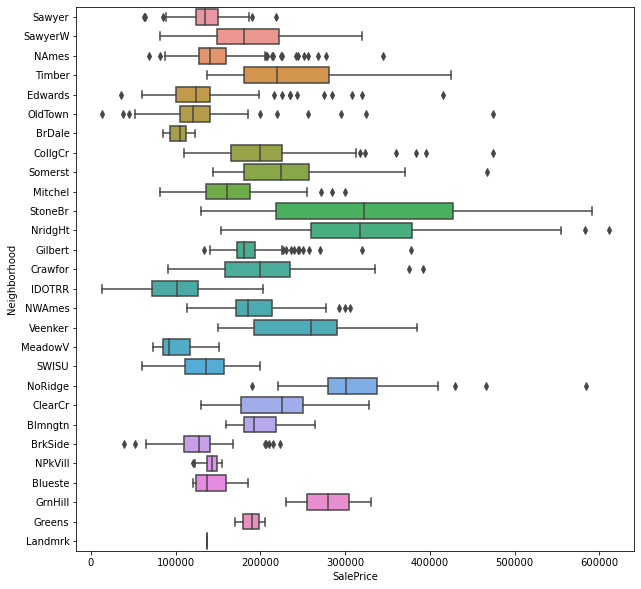

In [597]:
# Total number of Neighborhood in the data
print('Total Number of Neighborhood:', train2['Neighborhood'].nunique())
# Construct a boxplot to visualize if Neighborhood does infact affect house prices
plt.figure(figsize=(10,10))
sns.boxplot(data=train2,x='SalePrice',y='Neighborhood');

- From the visualization we can see that some Neighborhood certainly does have a higher price than others
Therefore, by creating a dummy variable, we will be able to see how much does each Neighborhood affect the price

In [598]:
# Create Neighborhood as a dummy variable
train2 = pd.get_dummies(train2, columns=['Neighborhood'], prefix='NBHD')
# Check to see the columns that are created
train2.columns[-28:]

Index(['NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide',
       'NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor', 'NBHD_Edwards',
       'NBHD_Gilbert', 'NBHD_Greens', 'NBHD_GrnHill', 'NBHD_IDOTRR',
       'NBHD_Landmrk', 'NBHD_MeadowV', 'NBHD_Mitchel', 'NBHD_NAmes',
       'NBHD_NPkVill', 'NBHD_NWAmes', 'NBHD_NoRidge', 'NBHD_NridgHt',
       'NBHD_OldTown', 'NBHD_SWISU', 'NBHD_Sawyer', 'NBHD_SawyerW',
       'NBHD_Somerst', 'NBHD_StoneBr', 'NBHD_Timber', 'NBHD_Veenker'],
      dtype='object')

In [599]:
print('Correlations of SalePrice with Neighborhood:')
print(" ")
print('NBHD_Blmngtn', train2['SalePrice'].corr(train2['NBHD_Blmngtn']))
print('NBHD_Blueste', train2['SalePrice'].corr(train2['NBHD_Blueste']))
print('NBHD_BrDale', train2['SalePrice'].corr(train2['NBHD_BrDale']))
print('NBHD_BrkSide', train2['SalePrice'].corr(train2['NBHD_BrkSide']))
print('NBHD_ClearCr', train2['SalePrice'].corr(train2['NBHD_ClearCr']))
print('NBHD_CollgCr', train2['SalePrice'].corr(train2['NBHD_CollgCr']))
print('NBHD_Crawfor', train2['SalePrice'].corr(train2['NBHD_Crawfor']))
print('NBHD_Edwards', train2['SalePrice'].corr(train2['NBHD_Edwards']))
print('NBHD_Gilbert', train2['SalePrice'].corr(train2['NBHD_Gilbert']))
print('NBHD_Greens', train2['SalePrice'].corr(train2['NBHD_Greens']))
print('NBHD_GrnHill', train2['SalePrice'].corr(train2['NBHD_GrnHill']))
print('NBHD_IDOTRR', train2['SalePrice'].corr(train2['NBHD_IDOTRR']))
print('NBHD_Landmrk', train2['SalePrice'].corr(train2['NBHD_Landmrk']))
print('NBHD_MeadowV', train2['SalePrice'].corr(train2['NBHD_MeadowV']))
print('NBHD_Mitchel', train2['SalePrice'].corr(train2['NBHD_Mitchel']))
print('NBHD_NAmes', train2['SalePrice'].corr(train2['NBHD_NAmes']))
print('NBHD_NPkVill', train2['SalePrice'].corr(train2['NBHD_NPkVill']))
print('NBHD_NWAmes', train2['SalePrice'].corr(train2['NBHD_NWAmes']))
print('NBHD_NoRidge', train2['SalePrice'].corr(train2['NBHD_NoRidge']))
print('NBHD_NridgHt', train2['SalePrice'].corr(train2['NBHD_NridgHt']))
print('NBHD_OldTown', train2['SalePrice'].corr(train2['NBHD_OldTown']))
print('NBHD_SWISU', train2['SalePrice'].corr(train2['NBHD_SWISU']))
print('NBHD_Sawyer', train2['SalePrice'].corr(train2['NBHD_Sawyer']))
print('NBHD_SawyerW', train2['SalePrice'].corr(train2['NBHD_SawyerW']))
print('NBHD_Somerst', train2['SalePrice'].corr(train2['NBHD_Somerst']))
print('NBHD_StoneBr', train2['SalePrice'].corr(train2['NBHD_StoneBr']))
print('NBHD_Timber', train2['SalePrice'].corr(train2['NBHD_Timber']))
print('NBHD_Veenker', train2['SalePrice'].corr(train2['NBHD_Veenker']))

Correlations of SalePrice with Neighborhood:
 
NBHD_Blmngtn 0.02488794265567875
NBHD_Blueste -0.025232968827034633
NBHD_BrDale -0.09531896206882438
NBHD_BrkSide -0.13481764805224664
NBHD_ClearCr 0.052490699632434606
NBHD_CollgCr 0.08227772809668797
NBHD_Crawfor 0.0583654571148769
NBHD_Edwards -0.17684790025043381
NBHD_Gilbert 0.02394609248011335
NBHD_Greens 0.0034717612186120836
NBHD_GrnHill 0.038845436509259444
NBHD_IDOTRR -0.18926600571231894
NBHD_Landmrk -0.012397822452663902
NBHD_MeadowV -0.11157316277863578
NBHD_Mitchel -0.03559922932326904
NBHD_NAmes -0.189456369726049
NBHD_NPkVill -0.047307352803611896
NBHD_NWAmes 0.03490284678105053
NBHD_NoRidge 0.2633848755626319
NBHD_NridgHt 0.44863922419377134
NBHD_OldTown -0.2084181181903822
NBHD_SWISU -0.07423033179304621
NBHD_Sawyer -0.13372579112729194
NBHD_SawyerW 0.01668414647278802
NBHD_Somerst 0.15005552064570624
NBHD_StoneBr 0.25696829848716823
NBHD_Timber 0.11638497115732875
NBHD_Veenker 0.08317681595545


We would also need to create a dummy variable for test dataset to match train dataset

In [600]:
# Find if the Neighborhood are the same in test and train dataset
# If not the same, what are the different values
print('Number of Neighborhood in test:', test1['Neighborhood'].nunique())
print('Not in test:', set(train1['Neighborhood'])-set(test1['Neighborhood']))
print('Not in train:', set(test1['Neighborhood'])-set(train1['Neighborhood']))

Number of Neighborhood in test: 26
Not in test: {'GrnHill', 'Landmrk'}
Not in train: set()


In [601]:
# Create Neighboord as a dummy variable for test dataset as well
test2 = pd.get_dummies(test2, columns=['Neighborhood'], prefix='NBHD')

# Create columns for testing data to match training data
test2['NBHD_GrnHill'] = 0
test2['NBHD_Landmrk'] = 0

In [602]:
# Check to see the columns that are created
test2.columns[-28:]

Index(['NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide',
       'NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor', 'NBHD_Edwards',
       'NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV',
       'NBHD_Mitchel', 'NBHD_NAmes', 'NBHD_NPkVill', 'NBHD_NWAmes',
       'NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU',
       'NBHD_Sawyer', 'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr',
       'NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk'],
      dtype='object')

Test our model by adding Neighborhood to see if our RMSE score reduced or not.

In [603]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk']

In [604]:
all_model(features)

LR R2 Score: 0.9017094613776264
LR R2 CV Score: -3.851057959160994e+20
LR RMSE CV: 703379873886453.9
 
Ridge R2 Score: 0.9016992977746395
Ridge R2 CV Score: 0.8919879764313414
Ridge RMSE CV: 26005.002382411018
 
Lasso R2 Score: 0.9007508316118736
Lasso R2 CV Score: 0.8932137072839496
Lasso RMSE CV: 25855.48117545261
 
EL R2 Score: 0.9007576859120408
EL R2 CV Score: 0.8932133655667533
EL RMSE CV: 25855.528812348995


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get reduces from 28,400 to 25,855.
- Therefore, Neighborhood does have quite an affect on sale price.

#### Construct a boxplot to see the effects of categorical variables.

We want to see relations between all categorical data and sale price. We're also going to sort them by the median value of that group so we can see the importances in descending order.

In [605]:
def srt_box(y, train2):
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(train2.select_dtypes(include=['object']).columns, axes):

        sortd = train2.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=train2,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

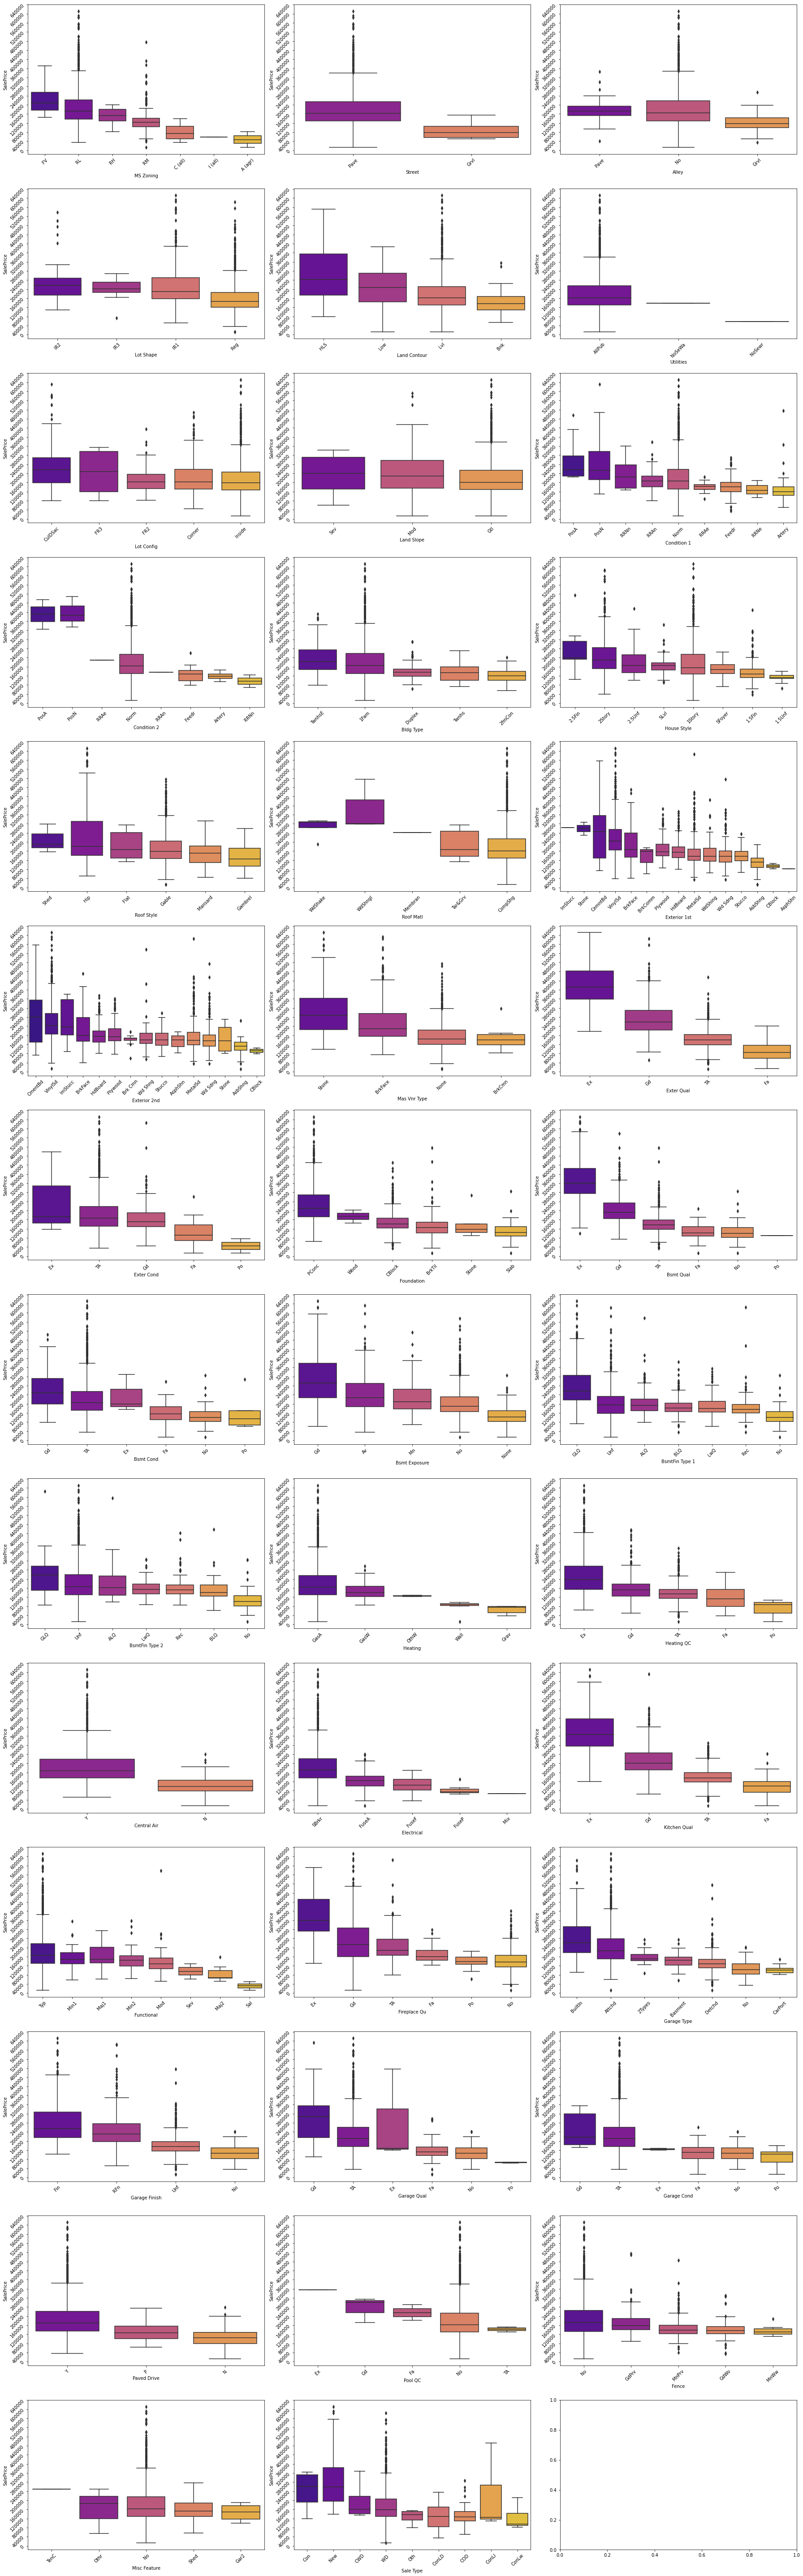

In [606]:
srt_box('SalePrice', train2);

#### Observation from above boxplot shows many features that affects SalePrice

<details><summary> Features Includes: </summary>
    
- Ms Zoning
- Street
- Land Contour
- Neighborhood
- Condition 1 and Condition 2
- Bldg Type	
- House Style	
- Roof Style	
- Roof Mat	
- Exterior 1	Exterior 2
- Mas Vnr Type	
- Exter Qual	
- Exter Cond	
- Foundation	
- Bsmt Qual	
- Bsmt Cond	
- Bsmt Exposure	
- BsmtFin Type 1	BsmtFin Type 2
- Heating	
- Heating QC	
- Central Air	
- Electrical	
- Kitchen Qual	
- Functional	
- Fireplace Qu	
- Garage Type	
- Garage Finish	
- Garage Qual	
- Garage Cond	
- Paved Drive	
- Pool QC
- Fence
</details>

#### Starting with ordinal features

Map ordinal features into integers

In [607]:
# Check to see that columns that have the same value
print(train2['Exter Qual'].unique())
print(train2['Exter Cond'].unique())
print(train2['Bsmt Qual'].unique())
print(train2['Bsmt Cond'].unique())
print(train2['Heating QC'].unique())
print(train2['Kitchen Qual'].unique())
print(train2['Fireplace Qu'].unique())
print(train2['Garage Qual'].unique())
print(train2['Garage Cond'].unique())
print(train2['Pool QC'].unique())
print(" ")
print(train2['Bsmt Exposure'].unique())
print(" ")
print(train2['BsmtFin Type 1'].unique())
print(train2['BsmtFin Type 2'].unique())
print(" ")
print(train2['Functional'].unique())
print(train2['Paved Drive'].unique())
print(train2['Garage Finish'].unique())
print(train2['Electrical'].unique())
print(train2['Fence'].unique())
print(train2['Central Air'].unique())

['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Gd' 'Fa' 'No' 'Ex' 'Po']
['TA' 'Gd' 'No' 'Fa' 'Po' 'Ex']
['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Gd' 'TA' 'Fa' 'Ex']
['No' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['TA' 'Fa' 'No' 'Gd' 'Ex' 'Po']
['TA' 'Fa' 'No' 'Po' 'Gd' 'Ex']
['No' 'Fa' 'Gd' 'Ex' 'TA']
 
['No' 'Gd' 'Av' 'None' 'Mn']
 
['GLQ' 'Unf' 'ALQ' 'Rec' 'No' 'BLQ' 'LwQ']
['Unf' 'Rec' 'No' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
 
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
['Y' 'N' 'P']
['RFn' 'Unf' 'Fin' 'No']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
['No' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
['Y' 'N']


In [608]:
# Set up mapping for Ordinal categories
condqual_map = {'No': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
bsmtex = {'No':2, 'Gd':5, 'Av':4, 'None':1, 'Mn':3}
bsmtfint = {'GLQ':7, 'Unf':2, 'ALQ':6, 'Rec':4, 'No':1, 'BLQ':5, 'LwQ':3}
functional = {'Typ':8, 'Mod':5, 'Min2':6, 'Maj1':4, 'Min1':7, 'Sev':2, 'Sal':1, 'Maj2':3}
paved_d = {'Y':3, 'N':1, 'P':2}
garage_fin = {'RFn':3,'Unf':2,'Fin':4,'No':1}
electrical = {'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1}
fence = {'No':1, 'MnPrv':4, 'GdPrv':5, 'GdWo':3, 'MnWw':2}
cenair = {'Y':1, 'N':0}

# Map columns that are quality or condition based use same mapping
train2['Exter Qual'] = train2['Exter Qual'].map(condqual_map).astype('int')
train2['Exter Cond'] = train2['Exter Cond'].map(condqual_map).astype('int')
train2['Bsmt Qual'] = train2['Bsmt Qual'].map(condqual_map).astype('int')
train2['Bsmt Cond'] = train2['Bsmt Cond'].map(condqual_map).astype('int')
train2['Heating QC'] = train2['Heating QC'].map(condqual_map).astype('int')
train2['Kitchen Qual'] = train2['Kitchen Qual'].map(condqual_map).astype('int')
train2['Fireplace Qu'] = train2['Fireplace Qu'].map(condqual_map).astype('int')
train2['Garage Qual'] = train2['Garage Qual'].map(condqual_map).astype('int')
train2['Garage Cond'] = train2['Garage Cond'].map(condqual_map).astype('int')
train2['Pool QC'] = train2['Pool QC'].map(condqual_map).astype('int')

train2['Bsmt Exposure'] = train2['Bsmt Exposure'].map(bsmtex).astype('int')

train2['BsmtFin Type 1'] = train2['BsmtFin Type 1'].map(bsmtfint).astype('int')
train2['BsmtFin Type 2'] = train2['BsmtFin Type 2'].map(bsmtfint).astype('int')

train2['Functional'] = train2['Functional'].map(functional).astype('int')
train2['Paved Drive'] = train2['Paved Drive'].map(paved_d).astype('int')
train2['Garage Finish'] = train2['Garage Finish'].map(garage_fin).astype('int')
train2['Electrical'] = train2['Electrical'].map(electrical).astype('int')
train2['Fence'] = train2['Fence'].map(fence).astype('int')
train2['Central Air'] = train2['Central Air'].map(cenair).astype('int')

In [609]:
ordinal_features = train2[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu',
                           'Garage Qual','Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                           'Functional','Paved Drive','Garage Finish','Electrical','Fence','Central Air','SalePrice']]

In [610]:
# Seeing the correlations of each ordinal features with sales price
ordinal_features.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Exter Qual  Kitchen Qual  Bsmt Qual  Garage Finish  \
SalePrice        1.0    0.715048      0.694295   0.613236       0.558566   

           Fireplace Qu  Heating QC  Bsmt Exposure  BsmtFin Type 1  \
SalePrice      0.539484    0.458636       0.426134        0.350728   

           Paved Drive  Garage Qual  Central Air  Garage Cond  Electrical  \
SalePrice     0.290528     0.285328     0.277425     0.265066     0.24789   

           Bsmt Cond  Functional  Exter Cond   Pool QC  BsmtFin Type 2  \
SalePrice   0.225096    0.125714    0.036393  0.033948        0.014037   

              Fence  
SalePrice -0.159136

Visualizing ordinal variables

C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\ACDMY5\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


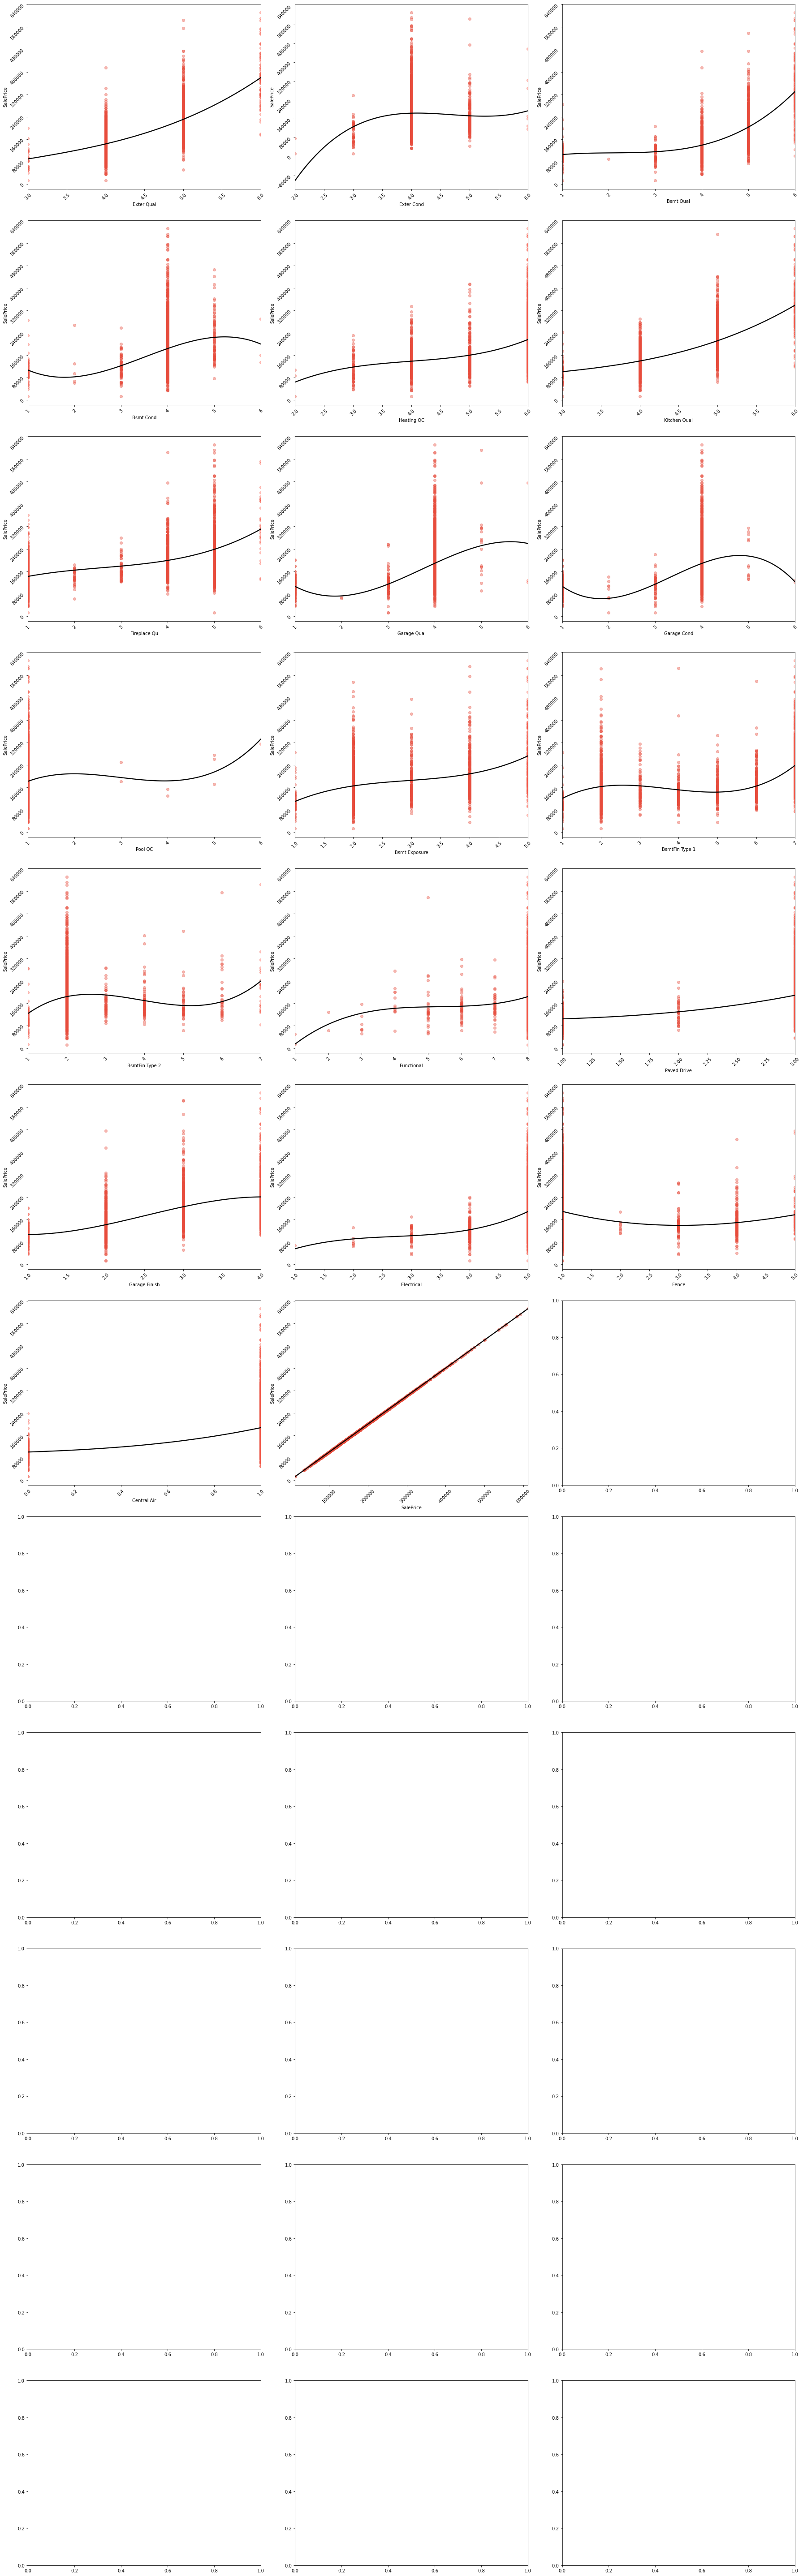

In [611]:
srt_reg('SalePrice', ordinal_features);

Map the same columns in the test dataset as well

In [612]:
test2['Exter Qual'] = test2['Exter Qual'].map(condqual_map).astype('int')
test2['Exter Cond'] = test2['Exter Cond'].map(condqual_map).astype('int')
test2['Bsmt Qual'] = test2['Bsmt Qual'].map(condqual_map).astype('int')
test2['Bsmt Cond'] = test2['Bsmt Cond'].map(condqual_map).astype('int')
test2['Heating QC'] = test2['Heating QC'].map(condqual_map).astype('int')
test2['Kitchen Qual'] = test2['Kitchen Qual'].map(condqual_map).astype('int')
test2['Fireplace Qu'] = test2['Fireplace Qu'].map(condqual_map).astype('int')
test2['Garage Qual'] = test2['Garage Qual'].map(condqual_map).astype('int')
test2['Garage Cond'] = test2['Garage Cond'].map(condqual_map).astype('int')
test2['Pool QC'] = test2['Pool QC'].map(condqual_map).astype('int')

test2['Bsmt Exposure'] = test2['Bsmt Exposure'].map(bsmtex).astype('int')

test2['BsmtFin Type 1'] = test2['BsmtFin Type 1'].map(bsmtfint).astype('int')
test2['BsmtFin Type 2'] = test2['BsmtFin Type 2'].map(bsmtfint).astype('int')

test2['Functional'] = test2['Functional'].map(functional).astype('int')
test2['Paved Drive'] = test2['Paved Drive'].map(paved_d).astype('int')
test2['Garage Finish'] = test2['Garage Finish'].map(garage_fin).astype('int')
test2['Electrical'] = test2['Electrical'].map(electrical).astype('int')
test2['Fence'] = test2['Fence'].map(fence).astype('int')
test2['Central Air'] = test2['Central Air'].map(cenair).astype('int')

Test Ordinal features with our model

In [613]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air']

In [614]:
all_model(features)

LR R2 Score: 0.9146708687910186
LR R2 CV Score: -7.20157923441598e+20
LR RMSE CV: 961864246188235.6
 
Ridge R2 Score: 0.9146592783650491
Ridge R2 CV Score: 0.9029104630397375
Ridge RMSE CV: 24633.028789340628
 
Lasso R2 Score: 0.9136780382013011
Lasso R2 CV Score: 0.9041899111612214
Lasso RMSE CV: 24467.486099306847
 
EL R2 Score: 0.9136694788555568
EL R2 CV Score: 0.9041903792712894
EL RMSE CV: 24467.46545980272


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get reduces from 25,855 to 24,467.
- Therefore, ordinal values does have quite an affect on sale price.

Testing ordinal features with high correlation only (above 0.3)

In [615]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Bsmt Qual','Heating QC','Kitchen Qual','Fireplace Qu','Bsmt Exposure','BsmtFin Type 1',
            'Garage Finish']

In [616]:
all_model(features)

LR R2 Score: 0.9108294970819762
LR R2 CV Score: -2.884586376694315e+20
LR RMSE CV: 608753798456822.4
 
Ridge R2 Score: 0.9108194236680629
Ridge R2 CV Score: 0.9009403473696314
Ridge RMSE CV: 24892.330547380825
 
Lasso R2 Score: 0.9100525754267725
Lasso R2 CV Score: 0.9018027329528818
Lasso RMSE CV: 24784.16285507055
 
EL R2 Score: 0.9100843229922004
EL R2 CV Score: 0.901800375482441
EL RMSE CV: 24784.439974017274


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,468 to 24,784.
- Therefore, models with high positive correlation does not always yield the best results

#### Analyzing the effects of nominal categorical features using dummy variables

#### MS Zoning

In [617]:
# Starting with MS Zoning
print(train2['MS Zoning'].nunique())
train2['MS Zoning'].unique()

7


array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [618]:
# Create a dummy variable for MS Zoning
train2 = pd.get_dummies(train2, columns=['MS Zoning'], prefix='MS(Z)')
# Check if the variables are created correctly
train2.columns[-7:]

Index(['MS(Z)_A (agr)', 'MS(Z)_C (all)', 'MS(Z)_FV', 'MS(Z)_I (all)',
       'MS(Z)_RH', 'MS(Z)_RL', 'MS(Z)_RM'],
      dtype='object')

In [619]:
MS_zoning_features = train2[['SalePrice','MS(Z)_A (agr)', 'MS(Z)_C (all)', 'MS(Z)_FV', 'MS(Z)_I (all)',
                             'MS(Z)_RH', 'MS(Z)_RL', 'MS(Z)_RM']]

In [620]:
# Seeing the correlations of each MS Zone features with sales price
MS_zoning_features.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  MS(Z)_RL  MS(Z)_FV  MS(Z)_RH  MS(Z)_I (all)  \
SalePrice        1.0  0.231567  0.106673 -0.034128      -0.034522   

           MS(Z)_A (agr)  MS(Z)_C (all)  MS(Z)_RM  
SalePrice      -0.052905      -0.126267 -0.282032

Do the same for test dataset as well

In [621]:
# Create a dummy variable for MS Zoning
test2 = pd.get_dummies(test2, columns=['MS Zoning'], prefix='MS(Z)')
# Check if the variables are created correctly
test2.columns[-7:]

Index(['NBHD_Landmrk', 'MS(Z)_C (all)', 'MS(Z)_FV', 'MS(Z)_I (all)',
       'MS(Z)_RH', 'MS(Z)_RL', 'MS(Z)_RM'],
      dtype='object')

In [622]:
test2['MS(Z)_A (agr)'] = 0

- Does not seem like a high correlation at all

In [623]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air',
            'MS(Z)_A (agr)', 'MS(Z)_C (all)', 'MS(Z)_FV', 'MS(Z)_I (all)','MS(Z)_RH', 'MS(Z)_RL', 'MS(Z)_RM']

In [624]:
all_model(features)

LR R2 Score: 0.9150802926736078
LR R2 CV Score: -1.0441261949897506e+21
LR RMSE CV: 1128166714180044.5
 
Ridge R2 Score: 0.915066742012004
Ridge R2 CV Score: 0.9026894056002736
Ridge RMSE CV: 24663.98845700451
 
Lasso R2 Score: 0.9136832427909545
Lasso R2 CV Score: 0.9037610316213287
Lasso RMSE CV: 24523.322035036043
 
EL R2 Score: 0.9136410112085298
EL R2 CV Score: 0.9037618969365759
EL RMSE CV: 24523.3923587937


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,467 to 24,523.
- Therefore, MS Zoning increases the error to sale price.

#### Street

In [625]:
# Street
print(train2['Street'].nunique())
train2['Street'].unique()

2


array(['Pave', 'Grvl'], dtype=object)

In [626]:
# Create a dummy variable for Street
train2 = pd.get_dummies(train2, columns=['Street'], prefix='Street')
# Check if the variables are created correctly
train2.columns[-2:]

Index(['Street_Grvl', 'Street_Pave'], dtype='object')

In [627]:
street_feature = train2[['SalePrice','Street_Grvl', 'Street_Pave']]
# Seeing the correlations of Street features with sales price
street_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Street_Pave  Street_Grvl
SalePrice        1.0      0.06985     -0.06985

Do the same for test dataset

In [628]:
# Check for unique values to match train dataset
test2['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [629]:
# Create a dummy variable for Street
test2 = pd.get_dummies(test2, columns=['Street'], prefix='Street')
# Check if the variables are created correctly
test2.columns[-2:]

Index(['Street_Grvl', 'Street_Pave'], dtype='object')

- Does not seem like a high correlation at all

In [630]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','Street_Grvl', 'Street_Pave']

In [631]:
all_model(features)

LR R2 Score: 0.9147196358900131
LR R2 CV Score: -1.8380129076616226e+20
LR RMSE CV: 485930533133905.2
 
Ridge R2 Score: 0.9147082509419492
Ridge R2 CV Score: 0.9027944063139441
Ridge RMSE CV: 24647.664789877945
 
Lasso R2 Score: 0.9136617771092074
Lasso R2 CV Score: 0.9041018224505709
Lasso RMSE CV: 24479.088930652128
 
EL R2 Score: 0.9136144210479097
EL R2 CV Score: 0.9041039980430124
EL RMSE CV: 24479.011182789636


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,467 to 24,479.
- Therefore, Street increases the error to sale price.

#### Land Contour

In [632]:
# Land Contour
print(train2['Land Contour'].nunique())
train2['Land Contour'].unique()

4


array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [633]:
# Create a dummy variable for Land Contour
train2 = pd.get_dummies(train2, columns=['Land Contour'], prefix='LC')
# Check if the variables are created correctly
train2.columns[-4:]

Index(['LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl'], dtype='object')

In [634]:
lc_feature = train2[['SalePrice','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl']]
# Seeing the correlations of Street features with sales price
lc_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice    LC_HLS    LC_Low    LC_Lvl    LC_Bnk
SalePrice        1.0  0.212229  0.032936 -0.093587 -0.098756

Do the same with test dataset

In [635]:
print(test2['Land Contour'].nunique())
test2['Land Contour'].unique()

4


array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [636]:
# Create a dummy variable for Land Contour
test2 = pd.get_dummies(test2, columns=['Land Contour'], prefix='LC')
# Check if the variables are created correctly
test2.columns[-4:]

Index(['LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl'], dtype='object')

In [637]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl']

In [638]:
all_model(features)

LR R2 Score: 0.9153324922777253
LR R2 CV Score: -6.572066872701101e+19
LR RMSE CV: 290570082704364.25
 
Ridge R2 Score: 0.9153191509417861
Ridge R2 CV Score: 0.9031293319303881
Ridge RMSE CV: 24600.482274956346
 
Lasso R2 Score: 0.9142701767335647
Lasso R2 CV Score: 0.904640716115153
Lasso RMSE CV: 24404.382557394376
 
EL R2 Score: 0.9142309788826821
EL R2 CV Score: 0.9046423241215347
EL RMSE CV: 24404.343863343052


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get reduces from 24,467 to 24,404.
- Therefore, Land Contour does reduce the error of sale price

#### Mas Vnr Type

In [639]:
# Check values for Mas Vnr Type
train2['Mas Vnr Type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [640]:
# Find if the Mas Vnr Type are the same in test and train dataset
# If not the same, what are the different values
print('Number of Mas Vnr Type in test:', test1['Mas Vnr Type'].nunique())
print('Not in test:', set(train1['Mas Vnr Type'])-set(test1['Mas Vnr Type']))
print('Not in train:', set(test1['Mas Vnr Type'])-set(train1['Mas Vnr Type']))

Number of Mas Vnr Type in test: 5
Not in test: set()
Not in train: {'CBlock'}


In [641]:
# Create a dummy variable for Mas Vnr Type
train2 = pd.get_dummies(train2, columns=['Mas Vnr Type'], prefix='MVT')
# Check if the variables are created correctly
train2.columns[-4:]

Index(['MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone'], dtype='object')

In [642]:
mvt_feature = train2[['SalePrice','MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone']]
# Seeing the correlations of Mas Vnr Type features with sales price
mvt_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  MVT_Stone  MVT_BrkFace  MVT_BrkCmn  MVT_None
SalePrice        1.0   0.312137     0.257884   -0.037257  -0.41163

Do the same with test dataset

In [643]:
# Create a dummy variable for Mas Vnr Type
test2 = pd.get_dummies(test2, columns=['Mas Vnr Type'], prefix='MVT')
# Check if the variables are created correctly
test2.columns[-5:]

Index(['MVT_BrkCmn', 'MVT_BrkFace', 'MVT_CBlock', 'MVT_None', 'MVT_Stone'], dtype='object')

In [644]:
# Match the columns with train dataset by creating or drop the 'CBlock'
test2 = test2.drop(columns='MVT_CBlock')

In [645]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone']

In [646]:
all_model(features)

LR R2 Score: 0.917208889170249
LR R2 CV Score: -8.40653285002907e+19
LR RMSE CV: 328630878115866.06
 
Ridge R2 Score: 0.9171957496167481
Ridge R2 CV Score: 0.9051971795055564
Ridge RMSE CV: 24332.68179189142
 
Lasso R2 Score: 0.9162424528824059
Lasso R2 CV Score: 0.9064085886983388
Lasso RMSE CV: 24171.29649551559
 
EL R2 Score: 0.9162683221638248
EL R2 CV Score: 0.9064069328472371
EL RMSE CV: 24171.448635274835


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,404 to 24,171.
- Therefore, Mas Vnr Type values does reduce error on selling price

#### House Style

In [647]:
train2['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [648]:
# Find if the House Style are the same in test and train dataset
# If not the same, what are the different values
print('Number of House Style in test:', test1['House Style'].nunique())
print('Not in test:', set(train1['House Style'])-set(test1['House Style']))
print('Not in train:', set(test1['House Style'])-set(train1['House Style']))

Number of House Style in test: 8
Not in test: set()
Not in train: set()


In [649]:
# Create a dummy variable for Mas Vnr Type
train2 = pd.get_dummies(train2, columns=['House Style'], prefix='HS')
# Check if the variables are created correctly
train2.columns[-8:]

Index(['HS_1.5Fin', 'HS_1.5Unf', 'HS_1Story', 'HS_2.5Fin', 'HS_2.5Unf',
       'HS_2Story', 'HS_SFoyer', 'HS_SLvl'],
      dtype='object')

In [650]:
hs_feature = train2[['SalePrice','HS_1.5Fin', 'HS_1.5Unf', 'HS_1Story', 'HS_2.5Fin', 'HS_2.5Unf',
                     'HS_2Story', 'HS_SFoyer', 'HS_SLvl']]
# Seeing the correlations of Housing style features with sales price
hs_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  HS_2Story  HS_2.5Fin  HS_2.5Unf  HS_1Story   HS_SLvl  \
SalePrice        1.0    0.20227   0.042511   0.010783  -0.021813 -0.042126   

           HS_SFoyer  HS_1.5Unf  HS_1.5Fin  
SalePrice  -0.064108  -0.066815  -0.195858

Do the same with test dataset

In [651]:
# Create a dummy variable for Housing Style
test2 = pd.get_dummies(test2, columns=['House Style'], prefix='HS')
# Check if the variables are created correctly
test2.columns[-8:]

Index(['HS_1.5Fin', 'HS_1.5Unf', 'HS_1Story', 'HS_2.5Fin', 'HS_2.5Unf',
       'HS_2Story', 'HS_SFoyer', 'HS_SLvl'],
      dtype='object')

In [652]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'HS_1.5Fin', 'HS_1.5Unf', 'HS_1Story', 'HS_2.5Fin','HS_2.5Unf','HS_2Story', 'HS_SFoyer', 'HS_SLvl']

In [653]:
all_model(features)

LR R2 Score: 0.9175112130238663
LR R2 CV Score: -5.478098380569194e+19
LR RMSE CV: 265286300738570.8
 
Ridge R2 Score: 0.9174970247994987
Ridge R2 CV Score: 0.903920976461573
Ridge RMSE CV: 24504.866276220655
 
Lasso R2 Score: 0.9162516778950357
Lasso R2 CV Score: 0.9056195431287254
Lasso RMSE CV: 24281.999062427138
 
EL R2 Score: 0.9162578523096825
EL R2 CV Score: 0.9056190319804813
EL RMSE CV: 24282.053344700464


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,171 to 24,281.
- Therefore, House Style values does have an adverse affect on sale price.

#### Roof Style

In [654]:
# Check for unique values about roof style
train2['Roof Style'].unique()

array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object)

In [655]:
# Create a dummy variable
train2 = pd.get_dummies(train2, columns=['Roof Style'], prefix='RStyl')
train2.columns[-6:]

Index(['RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip',
       'RStyl_Mansard', 'RStyl_Shed'],
      dtype='object')

In [656]:
# Find if the Roof Style are the same in test and train dataset
# If not the same, what are the different values
print(test2['Roof Style'].nunique())
print('not in test:',set(train1['Roof Style'])-set(test1['Roof Style']))
print('not in train:',set(test1['Roof Style'])-set(train1['Roof Style']))

6
not in test: set()
not in train: set()


In [657]:
# Create Roof Style as a dummy variable for test dataset as well
test2 = pd.get_dummies(test2, columns=['Roof Style'], prefix='RStyl')
test2.columns[-6:]

Index(['RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip',
       'RStyl_Mansard', 'RStyl_Shed'],
      dtype='object')

In [658]:
rstyl_feature = train2[['SalePrice','RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed']]
# Seeing the correlations of Roof style features with sales price
rstyl_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  RStyl_Hip  RStyl_Shed  RStyl_Flat  RStyl_Mansard  \
SalePrice        1.0    0.26601    0.013132    0.010215      -0.021297   

           RStyl_Gambrel  RStyl_Gable  
SalePrice      -0.041893    -0.250019

In [659]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed']

In [660]:
all_model(features)

LR R2 Score: 0.918413690117203
LR R2 CV Score: -5.140473815733657e+24
LR RMSE CV: 8.126461565820152e+16
 
Ridge R2 Score: 0.9184011221114434
Ridge R2 CV Score: 0.9050836374882248
Ridge RMSE CV: 24354.710542766516
 
Lasso R2 Score: 0.9173122512837989
Lasso R2 CV Score: 0.9066415740745185
Lasso RMSE CV: 24149.64265130654
 
EL R2 Score: 0.9172886174945485
EL R2 CV Score: 0.9066413729649347
EL RMSE CV: 24149.732753436132


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,171 to 24,149.
- Therefore, Roof Style values does reduce error on selling price

#### Foundation

In [661]:
# Check for unique values in Foundation
print(train2['Foundation'].unique())
# Create a dummy for Foundation
train2 = pd.get_dummies(train2, columns=['Foundation'], prefix='Foundation')
train2.columns

['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']


Index(['Id', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Alley', 'Lot Shape',
       'Utilities', 'Lot Config', 'Land Slope', 'Condition 1',
       ...
       'RStyl_Gambrel', 'RStyl_Hip', 'RStyl_Mansard', 'RStyl_Shed',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood'],
      dtype='object', length=137)

Do the same for test dataset

In [662]:
print(test2['Foundation'].unique())
test2 = pd.get_dummies(test2, columns=['Foundation'], prefix='Foundation')

['Stone' 'CBlock' 'PConc' 'BrkTil' 'Slab' 'Wood']


In [663]:
test2.columns[-6:]

Index(['Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood'],
      dtype='object')

In [664]:
found_feature = train2[['SalePrice','Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 
                        'Foundation_Stone', 'Foundation_Wood']]
# Seeing the correlations of Roof style features with sales price
found_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Foundation_PConc  Foundation_Wood  Foundation_Stone  \
SalePrice        1.0            0.5295        -0.003047         -0.023859   

           Foundation_Slab  Foundation_BrkTil  Foundation_CBlock  
SalePrice         -0.11907           -0.22995          -0.355768

In [665]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']

In [666]:
all_model(features)

LR R2 Score: 0.9189885090912713
LR R2 CV Score: -1.954621031747077e+21
LR RMSE CV: 1749662921554146.5
 
Ridge R2 Score: 0.9189744474486393
Ridge R2 CV Score: 0.90521967048491
Ridge RMSE CV: 24337.542203116842
 
Lasso R2 Score: 0.9176379824380028
Lasso R2 CV Score: 0.9069192317834236
Lasso RMSE CV: 24117.76685383167
 
EL R2 Score: 0.9176732914844873
EL R2 CV Score: 0.9069160750154494
EL RMSE CV: 24118.099103086355


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,149 to 24,117.
- Therefore, Foundation values does reduce error on selling price

#### Exterior 1

In [667]:
# Check for unique values 
print(train2['Exterior 1st'].nunique())
train2['Exterior 1st'].unique()

15


array(['HdBoard', 'VinylSd', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd',
       'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone',
       'CBlock', 'ImStucc', 'AsphShn'], dtype=object)

In [668]:
# Check for uni
print(test2['Exterior 1st'].nunique())
test1['Exterior 1st'].unique()

13


array(['AsbShng', 'Plywood', 'VinylSd', 'Wd Sdng', 'CemntBd', 'MetalSd',
       'HdBoard', 'BrkComm', 'Stucco', 'WdShing', 'BrkFace', 'PreCast',
       'AsphShn'], dtype=object)

In [669]:
print('not in test:',set(train2['Exterior 1st'])-set(test2['Exterior 1st']))
print('not in train:',set(test2['Exterior 1st'])-set(train2['Exterior 1st']))

not in test: {'ImStucc', 'Stone', 'CBlock'}
not in train: {'PreCast'}


In [670]:
# Get dummy for both dataset
train2 = pd.get_dummies(train2, columns=['Exterior 1st'], prefix='Ext1')
test2 = pd.get_dummies(test2, columns=['Exterior 1st'], prefix='Ext1')

In [671]:
# Add missing columns to match the datasets
train2['Ext1_PreCast'] = 0
test2['Ext1_CBlock'] = 0
test2['Ext1_ImStucc'] = 0
test2['Ext1_Stone'] = 0

In [672]:
train2.columns[-16:]

Index(['Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace',
       'Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 'Ext1_ImStucc',
       'Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco',
       'Ext1_VinylSd', 'Ext1_Wd Sdng', 'Ext1_WdShing', 'Ext1_PreCast'],
      dtype='object')

In [673]:
ext1_feature = train2[['SalePrice','Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 
                       'Ext1_CemntBd', 'Ext1_HdBoard', 'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 
                       'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 'Ext1_WdShing', 'Ext1_PreCast']]
# Seeing the correlations of Exterior 1st features with sales price
ext1_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Ext1_VinylSd  Ext1_CemntBd  Ext1_Stone  Ext1_BrkFace  \
SalePrice        1.0      0.342156      0.168318    0.030368       0.02622   

           Ext1_ImStucc  Ext1_BrkComm  Ext1_AsphShn  Ext1_CBlock  \
SalePrice      0.022444     -0.024382     -0.027624    -0.034787   

           Ext1_Plywood  Ext1_WdShing  Ext1_Stucco  Ext1_HdBoard  \
SalePrice     -0.039161     -0.048885    -0.060842     -0.114392   

           Ext1_AsbShng  Ext1_MetalSd  Ext1_Wd Sdng  Ext1_PreCast  
SalePrice     -0.126359     -0.149919     -0.191799           NaN

In [674]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast']

In [675]:
all_model(features)

LR R2 Score: 0.9210828920773794
LR R2 CV Score: -2.1032814034493616e+21
LR RMSE CV: 1721482407833501.8
 
Ridge R2 Score: 0.9210678802574781
Ridge R2 CV Score: 0.9058429941556583
Ridge RMSE CV: 24258.796606440745
 
Lasso R2 Score: 0.9195009007480687
Lasso R2 CV Score: 0.9076880502395415
Lasso RMSE CV: 24019.043838891645
 
EL R2 Score: 0.9194451988293411
EL R2 CV Score: 0.9076888570598551
EL RMSE CV: 24019.0755600455


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,117 to 24,019.
- Therefore, Exterior 1st values does reduce error on selling price

#### Exterior 2nd

In [676]:
# Check for unique values
print(train2['Exterior 2nd'].nunique())
print(train2['Exterior 2nd'].unique())
print(test2['Exterior 2nd'].nunique())
print(test2['Exterior 2nd'].unique())
# Check for missing values
print('not in test:',set(train2['Exterior 2nd'])-set(test2['Exterior 2nd']))
print('not in train:',set(test2['Exterior 2nd'])-set(train2['Exterior 2nd']))

15
['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
16
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CmentBd' 'MetalSd' 'BrkFace'
 'Stucco' 'HdBoard' 'Wd Shng' 'ImStucc' 'Brk Cmn' 'PreCast' 'CBlock'
 'AsphShn' 'Other']
not in test: {'Stone'}
not in train: {'PreCast', 'Other'}


In [677]:
# Get dummy for both datasets
train2 = pd.get_dummies(train2, columns=['Exterior 2nd'], prefix='Ext2')
test2 = pd.get_dummies(test2, columns=['Exterior 2nd'], prefix='Ext2')

In [678]:
# Add columns of missing values to datasets
train2['Ext2_Other'] = 0
train2['Ext2_PreCast'] = 0
test2['Ext2_Stone'] = 0

In [679]:
train2.columns[-17:]

Index(['Ext2_AsbShng', 'Ext2_AsphShn', 'Ext2_Brk Cmn', 'Ext2_BrkFace',
       'Ext2_CBlock', 'Ext2_CmentBd', 'Ext2_HdBoard', 'Ext2_ImStucc',
       'Ext2_MetalSd', 'Ext2_Plywood', 'Ext2_Stone', 'Ext2_Stucco',
       'Ext2_VinylSd', 'Ext2_Wd Sdng', 'Ext2_Wd Shng', 'Ext2_Other',
       'Ext2_PreCast'],
      dtype='object')

In [680]:
ext2_feature = train2[['SalePrice','Ext2_AsbShng', 'Ext2_AsphShn', 'Ext2_Brk Cmn', 'Ext2_BrkFace','Ext2_CBlock',
                       'Ext2_CmentBd', 'Ext2_HdBoard', 'Ext2_ImStucc','Ext2_MetalSd', 'Ext2_Plywood', 'Ext2_Stone',
                       'Ext2_Stucco','Ext2_VinylSd', 'Ext2_Wd Sdng', 'Ext2_Wd Shng', 'Ext2_Other','Ext2_PreCast']]
# Seeing the correlations of Exterior 2nd features with sales price
ext2_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Ext2_VinylSd  Ext2_CmentBd  Ext2_ImStucc  Ext2_BrkFace  \
SalePrice        1.0      0.337571      0.157748      0.042623      0.010673   

           Ext2_AsphShn  Ext2_Stone  Ext2_CBlock  Ext2_Brk Cmn  Ext2_Stucco  \
SalePrice     -0.023839   -0.024649     -0.03528     -0.047905    -0.051655   

           Ext2_Plywood  Ext2_Wd Shng  Ext2_HdBoard  Ext2_AsbShng  \
SalePrice     -0.059582     -0.061187     -0.102518      -0.11042   

           Ext2_MetalSd  Ext2_Wd Sdng  Ext2_Other  Ext2_PreCast  
SalePrice     -0.139405     -0.173032         NaN           NaN

In [681]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Ext2_AsbShng', 'Ext2_AsphShn', 'Ext2_Brk Cmn', 'Ext2_BrkFace','Ext2_CBlock','Ext2_CmentBd', 'Ext2_HdBoard',
            'Ext2_ImStucc','Ext2_MetalSd', 'Ext2_Plywood', 'Ext2_Stone','Ext2_Stucco','Ext2_VinylSd', 'Ext2_Wd Sdng',
            'Ext2_Wd Shng', 'Ext2_Other','Ext2_PreCast']

In [682]:
all_model(features)

LR R2 Score: 0.9215520353496548
LR R2 CV Score: -1.2360865374594625e+22
LR RMSE CV: 4948211172216639.0
 
Ridge R2 Score: 0.9215345525728617
Ridge R2 CV Score: 0.9044852444318277
Ridge RMSE CV: 24436.501870242897
 
Lasso R2 Score: 0.9194170919157258
Lasso R2 CV Score: 0.9073217431909839
Lasso RMSE CV: 24070.025747429117
 
EL R2 Score: 0.9193652320393966
EL R2 CV Score: 0.9073222167685213
EL RMSE CV: 24070.086432804008


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,019 to 24,070.
- Therefore, Exterior 2nd values does increase error on selling price.

#### Heating

In [683]:
# Check for unique values in Heating
print(train2['Heating'].unique())
print(test2['Heating'].unique())

['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
['GasA' 'GasW' 'Grav' 'Floor']


In [684]:
# Check for missing values
print('not in test:',set(train2['Heating'])-set(test2['Heating']))
print('not in train:',set(test2['Heating'])-set(train2['Heating']))

not in test: {'Wall', 'OthW'}
not in train: {'Floor'}


In [685]:
# Create dummy for both datasets
train2 = pd.get_dummies(train2, columns=['Heating'], prefix='Heat')
test2 = pd.get_dummies(test2, columns=['Heating'], prefix='Heat')

In [686]:
# Add missing columns in both dataset
train2['Heat_Floor'] = 0
test2['Heat_OthW'] = 0
test2['Heat_Wall'] = 0

In [687]:
# Check for created columns
train2.columns[-6:]

Index(['Heat_GasA', 'Heat_GasW', 'Heat_Grav', 'Heat_OthW', 'Heat_Wall',
       'Heat_Floor'],
      dtype='object')

In [688]:
heat_feature = train2[['SalePrice','Heat_GasA', 'Heat_GasW', 'Heat_Grav', 'Heat_OthW', 'Heat_Wall','Heat_Floor']]
# Seeing the correlations of Heat features with sales price
heat_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Heat_GasA  Heat_OthW  Heat_GasW  Heat_Wall  Heat_Grav  \
SalePrice        1.0   0.094045  -0.021973  -0.037826  -0.071318  -0.072556   

           Heat_Floor  
SalePrice         NaN

In [689]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Ext2_AsbShng', 'Ext2_AsphShn', 'Ext2_Brk Cmn', 'Ext2_BrkFace','Ext2_CBlock','Ext2_CmentBd', 'Ext2_HdBoard',
            'Ext2_ImStucc','Ext2_MetalSd', 'Ext2_Plywood', 'Ext2_Stone','Ext2_Stucco','Ext2_VinylSd', 'Ext2_Wd Sdng',
            'Ext2_Wd Shng', 'Ext2_Other','Ext2_PreCast',
            'Heat_GasA', 'Heat_GasW', 'Heat_Grav', 'Heat_OthW', 'Heat_Wall','Heat_Floor']

In [690]:
all_model(features)

LR R2 Score: 0.9219990328579302
LR R2 CV Score: -1.142748553949403e+22
LR RMSE CV: 4775420451324851.0
 
Ridge R2 Score: 0.9219814103971148
Ridge R2 CV Score: 0.9040787570936939
Ridge RMSE CV: 24490.491780902878
 
Lasso R2 Score: 0.9198290601630601
Lasso R2 CV Score: 0.9072423756379276
Lasso RMSE CV: 24079.965211174007
 
EL R2 Score: 0.9197806313668244
EL R2 CV Score: 0.9072429598675578
EL RMSE CV: 24080.02363368705


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get increases from 24,070 to 24,079.
- Therefore, Heat values does increase error on selling price very slightly.

#### Garage Type

In [691]:
# Check for unique values
print(train2['Garage Type'].unique())
print(test2['Garage Type'].unique())

['Attchd' 'Detchd' 'BuiltIn' 'Basment' 'No' '2Types' 'CarPort']
['Detchd' 'Attchd' 'BuiltIn' 'No' '2Types' 'CarPort' 'Basment']


In [692]:
# Check for missing values
print('not in test:', set(train2['Garage Type'])-set(test2['Garage Type']))
print('not in train:', set(test2['Garage Type'])-set(train2['Garage Type']))

not in test: set()
not in train: set()


In [693]:
# Get dummy for both datasets
train2 = pd.get_dummies(train2, columns=['Garage Type'], prefix='Gtype')
test2 = pd.get_dummies(test2, columns=['Garage Type'], prefix='Gtype')

In [694]:
# Check for create columns
train2.columns[-7:]

Index(['Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn',
       'Gtype_CarPort', 'Gtype_Detchd', 'Gtype_No'],
      dtype='object')

In [695]:
gtype_feature = train2[['SalePrice','Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort',
                        'Gtype_Detchd', 'Gtype_No']]
# Seeing the correlations of Garage Type features with sales price
gtype_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Gtype_Attchd  Gtype_BuiltIn  Gtype_2Types  \
SalePrice        1.0      0.358104         0.2198     -0.029648   

           Gtype_Basment  Gtype_CarPort  Gtype_No  Gtype_Detchd  
SalePrice      -0.055735      -0.071965  -0.23103     -0.370485

In [696]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No']

In [697]:
all_model(features)

LR R2 Score: 0.9215294637331781
LR R2 CV Score: -4.909066096963603e+23
LR RMSE CV: 2.5941372737001096e+16
 
Ridge R2 Score: 0.9215121995943499
Ridge R2 CV Score: 0.9055609857744052
Ridge RMSE CV: 24289.786360281596
 
Lasso R2 Score: 0.9196722228627251
Lasso R2 CV Score: 0.9077695612644006
Lasso RMSE CV: 24006.30153993108
 
EL R2 Score: 0.9197019677574323
EL R2 CV Score: 0.9077682260131621
EL RMSE CV: 24006.37869708686


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,019 to 24,006.
- Therefore, Garage Type values does reduce error on selling price by a little.

#### Sale Type

In [698]:
# Check for unique values in Sale Type
print(train2['Sale Type'].unique())
print(test2['Sale Type'].unique())

['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
['WD ' 'New' 'Con' 'COD' 'VWD' 'CWD' 'ConLD' 'ConLI' 'Oth' 'ConLw']


In [699]:
# Check for missing values
print('not in test:', set(train2['Sale Type'])-set(test2['Sale Type']))
print('not in train:', set(test2['Sale Type'])-set(train2['Sale Type']))

not in test: set()
not in train: {'VWD'}


In [700]:
# Get dummy for both datasets
train2 = pd.get_dummies(train2, columns=['Sale Type'], prefix='Saletype')
test2 = pd.get_dummies(test2, columns=['Sale Type'], prefix='Saletype')

In [701]:
test2.columns[-10:]

Index(['Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD',
       'Saletype_ConLI', 'Saletype_ConLw', 'Saletype_New', 'Saletype_Oth',
       'Saletype_VWD', 'Saletype_WD '],
      dtype='object')

In [702]:
# Add the missing column
train2['Saletype_VWD'] = 0

In [703]:
stype_feature = train2[['SalePrice','Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI',
                        'Saletype_ConLw', 'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ']]
# Seeing the correlations of Garage Type features with sales price
stype_feature.corr()['SalePrice'].sort_values(ascending=False).to_frame().transpose()

SalePrice  Saletype_New  Saletype_Con  Saletype_ConLI  \
SalePrice        1.0      0.360599      0.033656        0.019582   

           Saletype_CWD  Saletype_Oth  Saletype_ConLw  Saletype_ConLD  \
SalePrice      0.004555     -0.030115       -0.035486       -0.060443   

           Saletype_COD  Saletype_WD   Saletype_VWD  
SalePrice     -0.107625     -0.213536           NaN

In [704]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No',
            'Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI', 'Saletype_ConLw',
            'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ']

In [705]:
all_model(features)

LR R2 Score: 0.9242336806284394
LR R2 CV Score: -1.1957858515858855e+24
LR RMSE CV: 3.823514365477229e+16
 
Ridge R2 Score: 0.9242178284022314
Ridge R2 CV Score: 0.9075286180980923
Ridge RMSE CV: 24043.746430616546
 
Lasso R2 Score: 0.9220427289514714
Lasso R2 CV Score: 0.9099221077016011
Lasso RMSE CV: 23737.01546999441
 
EL R2 Score: 0.9219875861395754
EL R2 CV Score: 0.9099229544526233
EL RMSE CV: 23737.059011564514


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 24,006 to 23,737.
- Therefore, Sale Type values does reduce error on selling price by a quite an amount.

#### Condition 1 and 2

In [706]:
# Check for unique values in Sale Type
print(train2['Condition 1'].unique())
print(test2['Condition 1'].unique())
print(" ")
print(train2['Condition 2'].unique())
print(test2['Condition 2'].unique())

['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'PosN' 'RRNn' 'RRAe' 'RRNe']
 
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
['Norm' 'PosN' 'Feedr' 'PosA']


In [707]:
# Check for missing values
print('Condition 1:')
print('not in test:', set(train2['Condition 1'])-set(test2['Condition 1']))
print('not in train:', set(test2['Condition 1'])-set(train2['Condition 1']))
print('Condition 2:')
print('not in test:', set(train2['Condition 2'])-set(test2['Condition 2']))
print('not in train:', set(test2['Condition 2'])-set(train2['Condition 2']))

Condition 1:
not in test: set()
not in train: set()
Condition 2:
not in test: {'RRAn', 'RRNn', 'RRAe', 'Artery'}
not in train: set()


In [708]:
# Get dummy for both datasets
train2 = pd.get_dummies(train2, columns=['Condition 1'], prefix='Cond1')
test2 = pd.get_dummies(test2, columns=['Condition 1'], prefix='Cond1')

train2 = pd.get_dummies(train2, columns=['Condition 2'], prefix='Cond2')
test2 = pd.get_dummies(test2, columns=['Condition 2'], prefix='Cond2')

In [709]:
# Check for columns
train2.columns[-8:]

Index(['Cond2_Artery', 'Cond2_Feedr', 'Cond2_Norm', 'Cond2_PosA', 'Cond2_PosN',
       'Cond2_RRAe', 'Cond2_RRAn', 'Cond2_RRNn'],
      dtype='object')

In [710]:
# Add missing values
test2['Cond2_RRAn'] = 0
test2['Cond2_RRNn'] = 0
test2['Cond2_RRAe'] = 0
test2['Cond2_Artery'] = 0

In [711]:
train2.columns[-18:]

Index(['Saletype_VWD', 'Cond1_Artery', 'Cond1_Feedr', 'Cond1_Norm',
       'Cond1_PosA', 'Cond1_PosN', 'Cond1_RRAe', 'Cond1_RRAn', 'Cond1_RRNe',
       'Cond1_RRNn', 'Cond2_Artery', 'Cond2_Feedr', 'Cond2_Norm', 'Cond2_PosA',
       'Cond2_PosN', 'Cond2_RRAe', 'Cond2_RRAn', 'Cond2_RRNn'],
      dtype='object')

In [712]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No',
            'Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI', 'Saletype_ConLw',
            'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ',
            'Cond1_Artery', 'Cond1_Feedr', 'Cond1_Norm','Cond1_PosA', 'Cond1_PosN', 'Cond1_RRAe', 'Cond1_RRAn', 'Cond1_RRNe',
            'Cond1_RRNn']
# With condition 1

In [713]:
all_model(features)

LR R2 Score: 0.9259639880305032
LR R2 CV Score: -6.031489526178464e+24
LR RMSE CV: 1.2563926097432555e+17
 
Ridge R2 Score: 0.9259507132750828
Ridge R2 CV Score: 0.9090108286097187
Ridge RMSE CV: 23849.255275865104
 
Lasso R2 Score: 0.9238998678762522
Lasso R2 CV Score: 0.9108633129797067
Lasso RMSE CV: 23613.65327399197
 
EL R2 Score: 0.9239650690806165
EL R2 CV Score: 0.9108594141837795
EL RMSE CV: 23613.968032900913


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 23,737 to 23,613.
- Therefore, Condition 1 values does decrease error on selling price.

In [714]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air','LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No',
            'Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI', 'Saletype_ConLw',
            'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ',
            'Cond1_Artery', 'Cond1_Feedr', 'Cond1_Norm','Cond1_PosA', 'Cond1_PosN', 'Cond1_RRAe', 'Cond1_RRAn', 'Cond1_RRNe',
            'Cond1_RRNn',
            'Cond2_Artery', 'Cond2_Feedr', 'Cond2_Norm', 'Cond2_PosA','Cond2_PosN', 'Cond2_RRAe', 'Cond2_RRAn', 
            'Cond2_RRNn']
# With condition 2

In [715]:
all_model(features)

LR R2 Score: 0.9264218427278386
LR R2 CV Score: -2.9961141910466007e+23
LR RMSE CV: 1.9278268445017024e+16
 
Ridge R2 Score: 0.92640563184525
Ridge R2 CV Score: 0.9090393041371744
Ridge RMSE CV: 23845.048915988405
 
Lasso R2 Score: 0.9242945887175862
Lasso R2 CV Score: 0.9111946166168723
Lasso RMSE CV: 23567.64201620898
 
EL R2 Score: 0.9243750239115437
EL R2 CV Score: 0.9111879332005886
EL RMSE CV: 23568.247687501535


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, the error we now get decreases from 23,613 to 23,567.
- Therefore, Condition 2 values does decrease error on selling price.

### Final Features

In [716]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Open Porch SF',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','Garage Yr Blt','2nd Flr SF','Bsmt Unf SF','Lot Frontage',
            'Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2','Misc Val','Yr Sold',
            'Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual',
            'Garage Cond','Pool QC','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Functional','Paved Drive',
            'Garage Finish','Electrical','Fence','Central Air',
            'LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No',
            'Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI', 'Saletype_ConLw',
            'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ',
            'Cond1_Artery', 'Cond1_Feedr', 'Cond1_Norm','Cond1_PosA', 'Cond1_PosN', 'Cond1_RRAe', 'Cond1_RRAn', 'Cond1_RRNe',
            'Cond1_RRNn',
            'Cond2_Artery', 'Cond2_Feedr', 'Cond2_Norm', 'Cond2_PosA','Cond2_PosN', 'Cond2_RRAe', 'Cond2_RRAn', 
            'Cond2_RRNn']

In [717]:
all_model(features)

LR R2 Score: 0.9264218427278386
LR R2 CV Score: -2.9961141910466007e+23
LR RMSE CV: 1.9278268445017024e+16
 
Ridge R2 Score: 0.92640563184525
Ridge R2 CV Score: 0.9090393041371744
Ridge RMSE CV: 23845.048915988405
 
Lasso R2 Score: 0.9242945887175862
Lasso R2 CV Score: 0.9111946166168723
Lasso RMSE CV: 23567.64201620898
 
EL R2 Score: 0.9243750239115437
EL R2 CV Score: 0.9111879332005886
EL RMSE CV: 23568.247687501535


- All models show a good score from validation
- The best error score we get is from Lasso Model with lowest RMSE CV.
- Even though the model does seem to be relatively optimal, our root mean squared error is 23,567.

In [718]:
def lasso_coefficient(features):
    X_train = train2[features]
    X_test = test2[features]
    
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_sc = ss.transform(X_train)
    X_test_sc = ss.transform(X_test)
    y_train = train2['SalePrice']

    lassoCV = LassoCV(n_alphas=5000)
    lassoCV.fit(X_train_sc, y_train)
    lasso = Lasso(alpha=(lassoCV.alpha_))
    lasso.fit(X_train_sc, y_train)
    
    lasso_df = pd.DataFrame(train2.loc[:,features].columns, columns=['features'])
    lasso_df['Coefficients'] = lasso.coef_
    return lasso_df.sort_values('Coefficients', ascending=False)

In [719]:
len(lasso_coefficient(features))

153

In [720]:
lasso_coefficient(features)

features  Coefficients
1          Gr Liv Area  25781.560529
0         Overall Qual  11875.991320
12        BsmtFin SF 1   9262.091806
6           Year Built   7068.028382
53        NBHD_NridgHt   6799.421893
4        Total Bsmt SF   6188.465780
10        Mas Vnr Area   5831.442986
59        NBHD_StoneBr   5672.531220
33        Overall Cond   5288.218870
64          Exter Qual   5231.443334
2          Garage Area   4983.724252
15            Lot Area   4938.910827
74       Bsmt Exposure   4902.834065
132       Saletype_New   4580.930719
69        Kitchen Qual   4297.482334
77          Functional   3450.392611
23        Screen Porch   3130.927788
62        NBHD_GrnHill   3116.871147
52        NBHD_NoRidge   3017.137532
42        NBHD_Crawfor   2106.348034
106       Ext1_BrkFace   2095.100328
138         Cond1_Norm   2059.068705
11          Fireplaces   1994.990530
58        NBHD_Somerst   1891.951485
84              LC_HLS   1891.913656
9        TotRms AbvGrd   1880.170940
125           Gtype_No   1850.022295
140         Cond1_PosN   1810.749475
94           RStyl_Hip   1731.100042
14        Wood Deck SF   1631.863188
66           Bsmt Qual   1621.552858
21        Lot Frontage   1536.062581
100    Foundation_Slab   1328.517567
148         Cond2_PosA   1324.165186
16      Bsmt Full Bath   1250.669881
68          Heating QC   1180.594766
3          Garage Cars   1138.594698
122      Gtype_BuiltIn   1120.036834
128       Saletype_Con   1033.843629
27        BsmtFin SF 2    951.662784
108       Ext1_CemntBd    926.064159
17           Half Bath    873.638383
39        NBHD_BrkSide    859.434988
99    Foundation_PConc    827.390564
50        NBHD_NPkVill    796.425478
7       Year Remod/Add    719.151121
139         Cond1_PosA    696.870945
56         NBHD_Sawyer    614.659895
13       Open Porch SF    573.170836
129     Saletype_ConLD    438.907468
133       Saletype_Oth    414.500551
127       Saletype_CWD    350.538721
104       Ext1_AsphShn    349.133279
111       Ext1_MetalSd    347.635081
38         NBHD_BrDale    298.474167
76      BsmtFin Type 2    217.831460
90           MVT_Stone    172.515740
70        Fireplace Qu    150.914226
73             Pool QC    140.351202
36        NBHD_Blmngtn     58.920726
5           1st Flr SF     40.139152
101   Foundation_Stone      3.882167
55          NBHD_SWISU      0.000000
118       Ext1_PreCast      0.000000
28            Misc Val      0.000000
124       Gtype_Detchd      0.000000
123      Gtype_CarPort     -0.000000
121      Gtype_Basment     -0.000000
114        Ext1_Stucco     -0.000000
117       Ext1_WdShing      0.000000
115       Ext1_VinylSd      0.000000
24          3Ssn Porch     -0.000000
107        Ext1_CBlock      0.000000
103       Ext1_AsbShng      0.000000
102    Foundation_Wood      0.000000
35      Enclosed Porch     -0.000000
26           Pool Area     -0.000000
131     Saletype_ConLw     -0.000000
130     Saletype_ConLI     -0.000000
142         Cond1_RRAn      0.000000
151         Cond2_RRAn      0.000000
149         Cond2_PosN     -0.000000
147         Cond2_Norm      0.000000
146        Cond2_Feedr     -0.000000
145       Cond2_Artery     -0.000000
143         Cond1_RRNe      0.000000
8            Full Bath      0.000000
96          RStyl_Shed      0.000000
18       Garage Yr Blt     -0.000000
19          2nd Flr SF      0.000000
137        Cond1_Feedr     -0.000000
135       Saletype_WD      -0.000000
134       Saletype_VWD      0.000000
20         Bsmt Unf SF     -0.000000
97   Foundation_BrkTil     -0.000000
152         Cond2_RRNn      0.000000
63        NBHD_Landmrk      0.000000
46         NBHD_IDOTRR     -0.000000
44        NBHD_Gilbert      0.000000
78         Paved Drive      0.000000
72         Garage Cond     -0.000000
79       Garage Finish      0.000000
37        NBHD_Blueste      0.000000
81               Fence      0.000000
71         Garage Qual      0.000000
83              LC_Bnk     -0.000000
40        NBHD_ClearCr     -0.000000
45         NBHD_Gr

#### Remove features as per Lasso model
Features that have coefficient of 0.

Features that increase or decrease the price of house by just 500 dollars.

Features that increase or decrease the price of house by less than 1000 dollars.

In [721]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','Year Built',
            'TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1',
            'Wood Deck SF','Lot Area','Bsmt Full Bath','Lot Frontage',
            'Bedroom AbvGr','Screen Porch',
            'MS SubClass','Overall Cond','Kitchen AbvGr',
            'NBHD_Blmngtn', 'NBHD_Blueste', 'NBHD_BrDale', 'NBHD_BrkSide','NBHD_ClearCr', 'NBHD_CollgCr', 'NBHD_Crawfor',
            'NBHD_Edwards','NBHD_Gilbert', 'NBHD_Greens', 'NBHD_IDOTRR', 'NBHD_MeadowV','NBHD_Mitchel', 'NBHD_NAmes',
            'NBHD_NPkVill', 'NBHD_NWAmes','NBHD_NoRidge', 'NBHD_NridgHt', 'NBHD_OldTown', 'NBHD_SWISU','NBHD_Sawyer',
            'NBHD_SawyerW', 'NBHD_Somerst', 'NBHD_StoneBr','NBHD_Timber', 'NBHD_Veenker', 'NBHD_GrnHill', 'NBHD_Landmrk',
            'Exter Qual','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual',
            'Bsmt Exposure','Functional',
            'LC_Bnk', 'LC_HLS', 'LC_Low', 'LC_Lvl',
            'MVT_BrkCmn', 'MVT_BrkFace', 'MVT_None', 'MVT_Stone',
            'RStyl_Flat', 'RStyl_Gable', 'RStyl_Gambrel', 'RStyl_Hip','RStyl_Mansard', 'RStyl_Shed',
            'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc','Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Ext1_AsbShng', 'Ext1_AsphShn', 'Ext1_BrkComm', 'Ext1_BrkFace','Ext1_CBlock', 'Ext1_CemntBd', 'Ext1_HdBoard', 
            'Ext1_ImStucc','Ext1_MetalSd', 'Ext1_Plywood', 'Ext1_Stone', 'Ext1_Stucco','Ext1_VinylSd', 'Ext1_Wd Sdng', 
            'Ext1_WdShing', 'Ext1_PreCast',
            'Gtype_2Types', 'Gtype_Attchd', 'Gtype_Basment', 'Gtype_BuiltIn','Gtype_CarPort','Gtype_Detchd', 'Gtype_No',
            'Saletype_COD', 'Saletype_CWD', 'Saletype_Con', 'Saletype_ConLD','Saletype_ConLI', 'Saletype_ConLw',
            'Saletype_New', 'Saletype_Oth','Saletype_VWD', 'Saletype_WD ',
            'Cond1_Artery', 'Cond1_Feedr', 'Cond1_Norm','Cond1_PosA', 'Cond1_PosN', 'Cond1_RRAe', 'Cond1_RRAn', 'Cond1_RRNe',
            'Cond1_RRNn',
            'Cond2_Artery', 'Cond2_Feedr', 'Cond2_Norm', 'Cond2_PosA','Cond2_PosN', 'Cond2_RRAe', 'Cond2_RRAn', 
            'Cond2_RRNn']

In [722]:
all_model(features)

LR R2 Score: 0.9248551656190829
LR R2 CV Score: -1.0618653233677483e+25
LR RMSE CV: 1.1345360681323437e+17
 
Ridge R2 Score: 0.9248477967187738
Ridge R2 CV Score: 0.9100961411397144
Ridge RMSE CV: 23710.560698285906
 
Lasso R2 Score: 0.923618296723524
Lasso R2 CV Score: 0.9116126761029261
Lasso RMSE CV: 23514.186357724477
 
EL R2 Score: 0.9236723076687225
EL R2 CV Score: 0.9116082790213863
EL RMSE CV: 23514.65167000288


- After removing insignificant features, our model still does very well with the error of 23,514 from Lasso Model.
- This shows that the lasso model provides an error of around 23,514 dollars from the price that it could actually be in the real world.
- It also generalizes fairly well as the validation score is very high, therefore, it should be fair assessment once new data is used for analysis. 

In [723]:
def submission(features):
    X_training = train2[features]
    X_testing = test2[features]

    ss_test = StandardScaler()
    ss_test.fit(X_training)
    X_training_scaled = ss_test.transform(X_training)
    X_testing_scaled = ss_test.transform(X_testing)
    y_training = train2['SalePrice']

    lr = LinearRegression()
    lr.fit(X_training_scaled,y_training)
    test2['SalePrice'] = lr.predict(X_testing_scaled)
    submission_lr = test2[['Id','SalePrice']]
    submission_lr.to_csv('final_submission_lr_V1.0.csv', index=False)

    ridgeCV = RidgeCV(alphas = np.linspace(0.1,10,50))
    ridgeCV.fit(X_training_scaled, y_training)
    ridge = Ridge(alpha=(ridgeCV.alpha_))
    ridge.fit(X_training_scaled, y_training)
    test2['SalePrice'] = ridge.predict(X_testing_scaled)
    submission_ridge = test2[['Id','SalePrice']]
    submission_ridge.to_csv('final_submission_ridge_V1.0.csv', index=False)

    elcv = ElasticNetCV(n_alphas=100, l1_ratio=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    elcv.fit(X_training_scaled, y_training)
    el = ElasticNet(alpha=(elcv.alpha_), l1_ratio=(elcv.l1_ratio_))
    el.fit(X_training_scaled, y_training)
    test2['SalePrice'] = el.predict(X_testing_scaled)
    submission_el = test2[['Id','SalePrice']]
    submission_el.to_csv('final_submission_el_V1.0.csv', index=False)

In [724]:
submission(features)

### Conclusion and Recommendation

#### A unit increase or having a feature will influence the selling price of a house by the following coefficients

#### With a total of 36 features

In [725]:
lasso_coefficient(features)

features  Coefficients
1          Gr Liv Area  26540.265895
0         Overall Qual  11726.567019
9         BsmtFin SF 1   8731.578762
5           Year Built   7323.770164
36        NBHD_NridgHt   6780.613108
7         Mas Vnr Area   5960.699482
4        Total Bsmt SF   5906.622647
42        NBHD_StoneBr   5621.004378
47          Exter Qual   5366.955236
17        Overall Cond   5326.900290
52       Bsmt Exposure   5000.086972
11            Lot Area   4942.387259
2          Garage Area   4924.155808
103       Saletype_New   4576.291100
51        Kitchen Qual   4462.451965
53          Functional   3414.370402
15        Screen Porch   3236.597755
45        NBHD_GrnHill   3119.925703
35        NBHD_NoRidge   3065.488432
77        Ext1_BrkFace   2243.099827
8           Fireplaces   2132.635341
25        NBHD_Crawfor   2076.788836
96            Gtype_No   2007.328789
41        NBHD_Somerst   1989.484303
109         Cond1_Norm   1958.295489
48           Bsmt Qual   1843.529135
6        TotRms AbvGrd   1843.035981
111         Cond1_PosN   1835.400769
55              LC_HLS   1804.748764
65           RStyl_Hip   1734.307533
12      Bsmt Full Bath   1684.971707
10        Wood Deck SF   1684.504912
13        Lot Frontage   1583.388151
119         Cond2_PosA   1366.975815
71     Foundation_Slab   1293.764557
3          Garage Cars   1232.178648
93       Gtype_BuiltIn   1136.991156
50          Heating QC   1077.299381
99        Saletype_Con   1069.192342
79        Ext1_CemntBd    918.504770
70    Foundation_PConc    902.412106
33        NBHD_NPkVill    901.910896
22        NBHD_BrkSide    813.677928
39         NBHD_Sawyer    705.229890
110         Cond1_PosA    649.636993
100     Saletype_ConLD    501.610722
75        Ext1_AsphShn    427.251490
98        Saletype_CWD    392.219212
21         NBHD_BrDale    370.464106
104       Saletype_Oth    367.786424
82        Ext1_MetalSd    258.741937
123         Cond2_RRNn     38.530805
61           MVT_Stone     34.353424
46        NBHD_Landmrk     16.713452
72    Foundation_Stone      9.024509
88        Ext1_WdShing      0.000000
23        NBHD_ClearCr      0.000000
86        Ext1_VinylSd      0.000000
89        Ext1_PreCast      0.000000
29         NBHD_IDOTRR     -0.000000
94       Gtype_CarPort     -0.000000
95        Gtype_Detchd      0.000000
28         NBHD_Greens     -0.000000
27        NBHD_Gilbert      0.000000
101     Saletype_ConLI     -0.000000
102     Saletype_ConLw     -0.000000
20        NBHD_Blueste      0.000000
30        NBHD_MeadowV     -0.000000
105       Saletype_VWD      0.000000
106       Saletype_WD      -0.000000
19        NBHD_Blmngtn      0.000000
113         Cond1_RRAn      0.000000
114         Cond1_RRNe      0.000000
116       Cond2_Artery     -0.000000
117        Cond2_Feedr     -0.000000
118         Cond2_Norm      0.000000
120         Cond2_PosN     -0.000000
122         Cond2_RRAn      0.000000
85         Ext1_Stucco     -0.000000
62          RStyl_Flat      0.000000
67          RStyl_Shed      0.000000
31        NBHD_Mitchel      0.000000
56              LC_Low     -0.000000
57              LC_Lvl      0.000000
78         Ext1_CBlock      0.000000
60            MVT_None      0.000000
44        NBHD_Veenker     -0.000000
54              LC_Bnk     -0.000000
43         NBHD_Timber     -0.000000
68   Foundation_BrkTil     -0.000000
63         RStyl_Gable     -0.000000
38          NBHD_SWISU      0.000000
74        Ext1_AsbShng      0.000000
73     Foundation_Wood      0.000000
64       RStyl_Gambrel    -47.986663
81        Ext1_ImStucc    -59.045241
92       Gtype_Basment    -98.200722
84          Ext1_Stone   -108.649479
108        Cond1_Feedr   -110.662184
76        Ext1_BrkComm   -143.431695
115         Cond1_RRNn   -321.285484
91        Gtype_Attchd   -378.663456
121         Cond2_RRAe   -386.805545
107       Cond1_Artery   -449.739929
26        NBHD_Edwards   -493.222962
83        Ext1_Plywood   -511.252974
112         Cond1_RRAe   -521.817089
40        NBHD_Saw

Top 10 Factors increasing the price of a house are:
1. Ground Liv Area
2. Overall Quality
3. Basement square feet type 1 that is finished
4. Year Built
5. Neighborhood - Northridge Heights
6. Masonry veneer area in square feet
7. Total Basement square feet
8. Neighborhood - Stone Brook
9. External Quality
10. Overall Condition

- As per top 10 factors increasing the price of a house, general look and feel of the house seems to be an important factor.
- The total livable surface area of the house also plays an important factor.
- Being in certain neighborhood would certainly yield a higher price.

.Top 10 Factors reducing the price of a house are:
1. MS Sub Class
2. Masonry veneer type - Brick Face
3. Bedroom above grade
4. Basement Condition
5. Roof Style - Mansard
6. Masonry veneer type - Brick Common
7. Kitchen above grade
8. Primary Exterior covering the house - Hard Board
9. Sale Type - Court Officer Deed/Estate
10. More than 1 type of garage

- The type of dwelling has quite a significant impact on house price
- Detail inspection aspect such as roof style, masonry veneer type and primary exterior plays down the price.